In [1]:
%pip install -q --no-warn-conflicts malariagen_data
%pip install -q --no-warn-conflicts cartopy
%pip install -q --no-warn-conflicts matplotlib-scalebar
%pip install -q --no-warn-conflicts petl
%pip install -U kaleido
%pip install -U plotly
import kaleido
kaleido.get_chrome_sync()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.9/775.9 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 

PosixPath('/usr/local/lib/python3.12/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome')

In [2]:
import allel
import malariagen_data
import itertools
import numpy as np
import re
import plotly.express as px
import pandas as pd
import petl as etl
pd.set_option("display.max_rows", None, "display.max_columns", None)
#pd.reset_option('^display.', silent=True)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
#import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects
import seaborn as sns

import cartopy.io.img_tiles as cimgt
request = cimgt.OSM()

In [4]:
import kaleido
import plotly.express as px
import plotly.io as pio
import PIL
import io
from IPython.display import Image
import plotly.graph_objects as go

In [ ]:
#Mounting Google Drive
#import os
#from google.colab import drive
#drive.mount("drive")

# make dir
#results_dir = '/home/mkient/gitrepos/IR/'
#os.makedirs(results_dir, exist_ok=True)
#os.chdir(results_dir)
#os.listdir()

In [5]:
#Mounting Google Drive
import os
from google.colab import drive
drive.mount("drive")

# make dir
results_dir = "drive/MyDrive"
os.makedirs(results_dir, exist_ok=True)

Mounted at drive


In [6]:
## Importing malariagen data set
ag3 = malariagen_data.Ag3("gs://vo_agam_release_master_us_central1/", pre=True)
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release_master_us_central1/
Data releases available : 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 3.10, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16
Results cache           : None
Cohorts analysis        : 20250815
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 15.4.0
Client location         : Iowa, United States (Google Cloud us-central1)
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact support@malariagen.net. For API documentation see 
https://malariagen.github.io/malariagen-data-python/v15.4.0/Ag3.html

In [7]:
df_samples=ag3.sample_metadata(sample_sets='3.11', sample_query='country=="Burkina Faso"')
sets = list(df_samples.sample_set.unique())

## load haplotypes data
haplo_sample_id = np.load('drive/MyDrive/sanger_analyses/resistance/VGSC/data/haplo_sample_id_all.npy',
                          allow_pickle=True).item()

map_dict = {}
for hap in haplo_sample_id.keys():
  hap_i = haplo_sample_id[hap]
  for sample_id in hap_i:
    map_dict[sample_id] = hap
len(map_dict.keys())

area_lab = {
    'Bana Village': 'BV',
    'Degue-Degue': 'DD',
    'Gama': 'GA',
    'Souroukoudinga': 'SK',
    'Sideradougou': 'SI',
    'Nagare': 'NG',
    'Nassan': 'NS',
    'Ouro-Hesso': 'OH',
    'Po-Dongo': 'Po',
}

df_samples['area_lab'] = df_samples.location.map(area_lab)
df_samples['haplo_id'] = df_samples.sample_id.map(map_dict)

df_samples.haplo_id.unique()

array(['FVI/FVI', 'OD', 'FL1T/LVI', 'LL1T/LL1T', 'LL1T/LL2T', 'FL2T/LVI'],
      dtype=object)

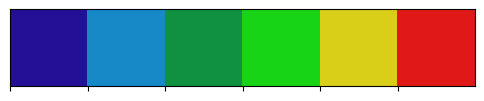

In [8]:
haps_id = list(df_samples.haplo_id.unique())

hap_labels = {
    'FVI/FVI': '995F+402V+1527I//995F+402V+1527I',
    'FL1T/LVI': '995F+402L(g>t)+1527T//995L+402V+1527I',
    'LL1T/LL1T':'995L+402L(g>t)+1527T//995L+402L(g>t)+1527T',
    'LL1T/LL2T': '995L+402L(g>t)+1527T//995L+402L(g>c)+1527T',
    'FL2T/LVI': '995F+402L(g>c)+1527T//995L+402V+1527I',
    'OD': 'Other diplotypes'
}

#hap_labels = {
#    'FF/FF': '995F/995F',
#    'LT/VT': '402L+1527T/402V+1527T',
#    'FLT/LVI': '995F+402L+1527T/995L+402V+1527I',
#    'LT/LT': '402L+1527T/402L+1527T',
#    'FT/LI': '995F+1527T/995L+1527I',
#    'OD': 'Other diplotypes'
#}

hap_colors = sns.color_palette('nipy_spectral', n_colors=len(haps_id), desat=0.8)
sns.palplot(hap_colors)

In [9]:
df_items = df_samples.groupby(['location','latitude','longitude']).size().reset_index(name='count')
#df_items
for row in df_items.itertuples():
  print(row.location, row.latitude, row.longitude)

Bana Village 11.233 -4.472
Degue-Degue 10.711 -4.326
Gama 12.003 1.762
Nagare 12.927 -0.142
Nassan 13.028 -3.014
Ouro-Hesso 14.375 -0.128
Po-Dongo 11.219 -1.02
Sideradougou 10.678 -4.256
Souroukoudinga 11.235 -4.535


In [10]:
df_item1 = df_samples.groupby(['location','aim_species','year']).size().reset_index(name='count')
coh_labels, coh_labs = {}, {}
for row in df_item1.itertuples():
  key = row.location[:4]+'_'+row.aim_species[:3]+'_'+str(row.year)
  if row.aim_species not in ['intermediate_gambiae_coluzzii','intermediate_gambcolu_arabiensis']:
    coh_labels[key]= 'An. '+row.aim_species+' ('+row.location[:4]+','+str(row.year)+')'
  else:
    coh_labels[key]= row.aim_species+' ('+row.location[:4]+','+str(row.year)+')'
#coh_labels
df_item1 = df_samples.query('year>2021').groupby(['location','aim_species','year']).size().reset_index(name='count')
for row in df_item1.itertuples():
  key = row.location[:4]+'_'+row.aim_species[:3]+'_'+str(row.year)
  if row.aim_species not in ['intermediate_gambiae_coluzzii','intermediate_gambcolu_arabiensis']:
    coh_labs[key]= row.location[:4]+' (A'+row.aim_species[:3]+')'
  else:
    coh_labs[key]= row.location[:4]+' ('+row.aim_species+')'
#coh_labs

In [ ]:
#coh_labs

In [11]:
color_1 = sns.light_palette("darkslategray",n_colors=100)
color_2 = sns.color_palette("ch:s=16,rot=0.05,dark=0.18,light=0.99", as_cmap=True)

In [12]:
path='drive/MyDrive/sanger_analyses/resistance/data/'
#os.listdir(path=path)

## Load data

In [13]:
df_vgsc = pd.read_table(f'{path}/df_vgsc_year.csv',sep=',',index_col=[0])
df_vgsc_maxaf = df_vgsc.query('effect == "NON_SYNONYMOUS_CODING" and max_af>0.05')

df_ace1 = pd.read_table(f'{path}/df_ace1_year.csv',sep=',',index_col=[0])
df_ace1_maxaf = df_ace1.query('effect == "NON_SYNONYMOUS_CODING" and max_af>0.05')

df_events_vgsc = pd.read_table(f'{path}/df_events_vgsc.csv',sep=',',index_col=[0])
df_events_ace1 = pd.read_table(f'{path}/df_events_ace1.csv',sep=',',index_col=[0])

df_haps = pd.read_table(f'{path}/df_haps.csv',sep=',',index_col=[0])

In [ ]:
#df_vgsc_maxaf1 = df_vgsc_maxaf.drop('frq_Bana_col_2021', axis=1)
pos_list = [2390177, 2391228, 2391228, 2416980, 2422651, 2422652, 2425417, 2429617,
            2429623, 2429694, 2429745, 2429896, 2429897, 2430106, 2430817, 2430863,
            2430880, 2430881, 2431061, 2431079]
df_vgsc_maxaf1 = df_vgsc_maxaf.drop(['frq_Bana_col_2021','frq_Sour_col_2021'], axis=1)
df_vgsc_maxaf1 = df_vgsc_maxaf1.query(f'position in {pos_list}')
df_vgsc_maxaf1.shape

(20, 39)

In [53]:
## Summary
df_vgsc_ms = df_vgsc.drop(['frq_Bana_col_2021','frq_Sour_col_2021'], axis=1)
#df_vgsc_ms.max_af.describe()

In [52]:
## Summary
df_gam = df_vgsc_ms.drop(['frq_Bana_col_2022', 'frq_Sour_col_2022','frq_Sour_ara_2022',
                          'frq_Nass_col_2022', 'frq_Nass_ara_2022','frq_Side_col_2022',
                          'frq_Side_ara_2022','frq_Po-D_ara_2022','frq_Po-D_col_2022',
                          'frq_Gama_ara_2022', 'frq_Gama_col_2022','frq_Ouro_col_2022',
                          'frq_Ouro_ara_2022','frq_Naga_col_2022', 'frq_Naga_ara_2022'], axis=1)
df_gam['max_af1'] = df_gam[['frq_Sour_gam_2022', 'frq_Side_gam_2022', 'frq_Degu_gam_2022',
                            'frq_Po-D_gam_2022', 'frq_Gama_gam_2022', 'frq_Naga_gam_2022',]].max(axis=1)

df_col = df_vgsc_ms.drop(['frq_Sour_gam_2022', 'frq_Sour_ara_2022', 'frq_Nass_ara_2022',
                          'frq_Side_gam_2022', 'frq_Side_ara_2022', 'frq_Degu_gam_2022',
                          'frq_Po-D_ara_2022', 'frq_Po-D_gam_2022', 'frq_Gama_ara_2022',
                          'frq_Gama_gam_2022', 'frq_Ouro_ara_2022', 'frq_Naga_gam_2022',
                          'frq_Naga_ara_2022'], axis=1)
df_col['max_af1'] = df_col[['frq_Bana_col_2022', 'frq_Sour_col_2022', 'frq_Nass_col_2022',
                            'frq_Side_col_2022', 'frq_Po-D_col_2022', 'frq_Gama_col_2022',
                            'frq_Ouro_col_2022', 'frq_Naga_col_2022',]].max(axis=1)

df_ara = df_vgsc_ms.drop(['frq_Bana_col_2022', 'frq_Sour_col_2022', 'frq_Sour_gam_2022',
                          'frq_Nass_col_2022', 'frq_Side_col_2022', 'frq_Side_gam_2022',
                          'frq_Degu_gam_2022', 'frq_Po-D_gam_2022', 'frq_Po-D_col_2022',
                          'frq_Gama_col_2022', 'frq_Gama_gam_2022', 'frq_Ouro_col_2022',
                          'frq_Naga_gam_2022', 'frq_Naga_col_2022'], axis=1)

df_ara['max_af1'] = df_ara[['frq_Sour_ara_2022', 'frq_Nass_ara_2022', 'frq_Side_ara_2022',
                            'frq_Po-D_ara_2022', 'frq_Gama_ara_2022', 'frq_Ouro_ara_2022',
                            'frq_Naga_ara_2022']].max(axis=1)

## nb of NS-SNP
print(f'An. gambiae: {np.count_nonzero(df_gam.query("effect == 'NON_SYNONYMOUS_CODING'").max_af1.values)} ns-SNP')
print(f'An. coluzzii: {np.count_nonzero(df_col.query("effect == 'NON_SYNONYMOUS_CODING'").max_af1.values)} ns-SNP')
print(f'An. arabiensis: {np.count_nonzero(df_ara.query("effect == 'NON_SYNONYMOUS_CODING'").max_af1.values)} ns-SNP')
print(f'Total: {np.count_nonzero(df_vgsc_ms.query("effect == 'NON_SYNONYMOUS_CODING'").max_af.values)} ns-SNP')
print(f'Total1: {np.count_nonzero(df_vgsc.query("effect == 'NON_SYNONYMOUS_CODING'").max_af.values)} ns-SNP')

An. gambiae: 65 ns-SNP
An. coluzzii: 281 ns-SNP
An. arabiensis: 61 ns-SNP
Total: 437 ns-SNP
Total1: 437 ns-SNP


In [57]:
df_vgsc.query('effect == "NON_SYNONYMOUS_CODING"').shape[0] ##

437

In [61]:
#df_vgsc_p.head()

In [58]:
df_vgsc_p = pd.read_table(f'{path}/df_vgsc_pop.csv',sep=',',index_col=[0])
df_vgsc_p.query('effect == "NON_SYNONYMOUS_CODING"').shape

(484, 39)

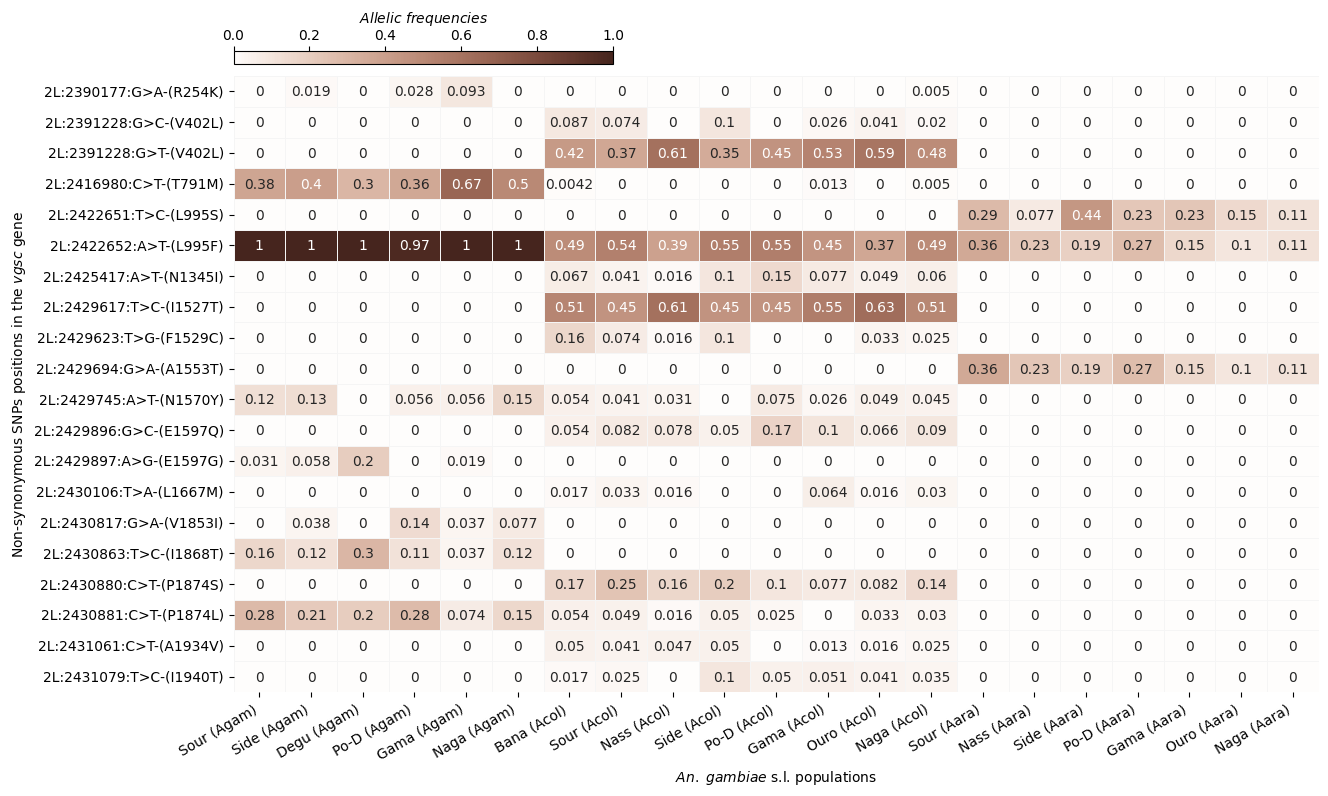

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(14, 8))
etl_df = etl.fromdataframe(df_vgsc_maxaf1)
col_list = [name for name in df_vgsc_maxaf1.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig,rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

# plot
ax=sns.heatmap(df_vgsc_maxaf1[col_list], vmin=0, vmax=1, cmap=color_2, yticklabels=labels, linewidths=0.5,
               xticklabels=[coh_labs[key.split('frq_')[1]] for key in col_list], linecolor="whitesmoke",annot=True, cbar=False)
#ax.set_title("Alternative alleles frequencies per population within the AGAP004050 gene")
plt.xticks(rotation=30, ha='right')

cax = inset_axes(ax, width="35%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$Allelic$ $frequencies$')

ax.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'Non-synonymous SNPs positions in the $vgsc$ gene')

plt.show()

fig.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/freq_heatmap.png',dpi=300, bbox_inches='tight')

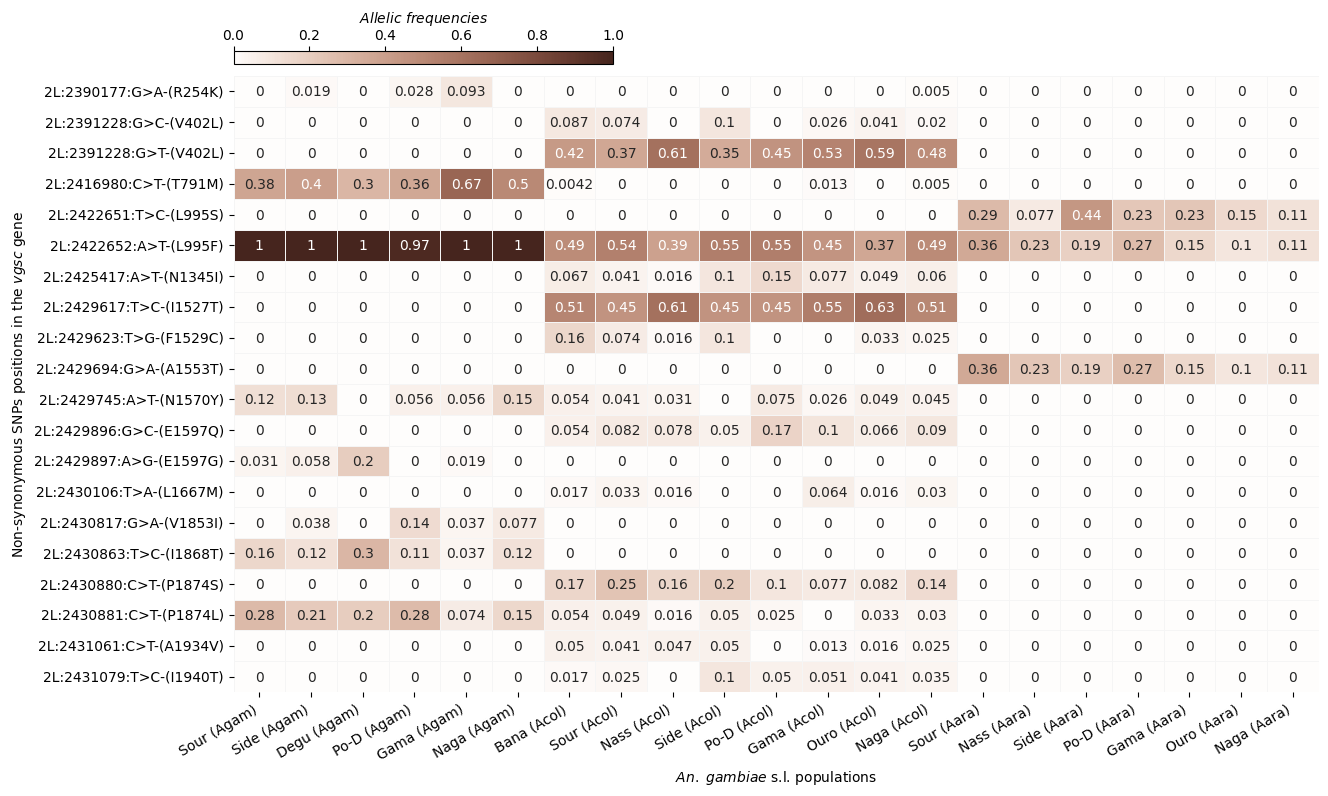

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(14, 8))
etl_df = etl.fromdataframe(df_vgsc_maxaf1)
col_list = [name for name in df_vgsc_maxaf1.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig,rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

# plot
ax=sns.heatmap(df_vgsc_maxaf1[col_list], vmin=0, vmax=1, cmap=color_2, yticklabels=labels, linewidths=0.5,
               xticklabels=[coh_labs[key.split('frq_')[1]] for key in col_list], linecolor="whitesmoke",annot=True, cbar=False)
#ax.set_title("Alternative alleles frequencies per population within the AGAP004050 gene")
plt.xticks(rotation=30, ha='right')

cax = inset_axes(ax, width="35%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$Allelic$ $frequencies$')

ax.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'Non-synonymous SNPs positions in the $vgsc$ gene')

plt.show()

fig.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/freq_heatmap.png',dpi=300, bbox_inches='tight')

In [ ]:
#df_samples.query('year>2021').groupby(['aim_species','location']).size()

In [49]:
#df_vgsc_maxaf1.columns

In [ ]:
col_list1 =  [
    'frq_Sour_gam_2022', 'frq_Side_gam_2022', 'frq_Degu_gam_2022', 'frq_Po-D_gam_2022', 'frq_Gama_gam_2022', 'frq_Naga_gam_2022',
    'frq_Bana_col_2022', 'frq_Sour_col_2022', 'frq_Side_col_2022', 'frq_Po-D_col_2022', 'frq_Gama_col_2022', 'frq_Nass_col_2022', 'frq_Naga_col_2022', 'frq_Ouro_col_2022',
    'frq_Sour_ara_2022', 'frq_Side_ara_2022', 'frq_Po-D_ara_2022', 'frq_Gama_ara_2022', 'frq_Nass_ara_2022', 'frq_Naga_ara_2022', 'frq_Ouro_ara_2022'
]

loc_list = [
    'Sour', 'Side','Degu', 'Po-D', 'Gama', 'Naga',
    'Bana', 'Sour','Side', 'Po-D', 'Gama', 'Nass', 'Naga', 'Ouro',
    'Sour','Side', 'Po-D', 'Gama', 'Nass', 'Naga', 'Ouro'
    ]

loc_list1 = [
    'Sour (n=16)', 'Side (n=26)','Degu (n=5)', 'Po-D (n=18)', 'Gama (n=27)', 'Naga (n=13)',
    'Bana (n=120)', 'Sour (n=61)','Side (n=10)', 'Po-D (n=20)', 'Gama (n=39)', 'Nass (n=32)', 'Naga (n=100)', 'Ouro (n=61)',
    'Sour (n=7)','Side (n=8)', 'Po-D (n=11)', 'Gama (n=13)', 'Nass (n=13)', 'Naga (n=9)', 'Ouro (n=10)'
    ]

In [50]:
#df_vgsc.columns

In [ ]:
Table_S1_ns_snp_vsgsc = df_vgsc.query('effect == "NON_SYNONYMOUS_CODING"')
Table_S1_ns_snp_vsgsc.to_excel('drive/MyDrive/sanger_analyses/resistance/data/Table_S1_ns_snp_vsgsc.xlsx')

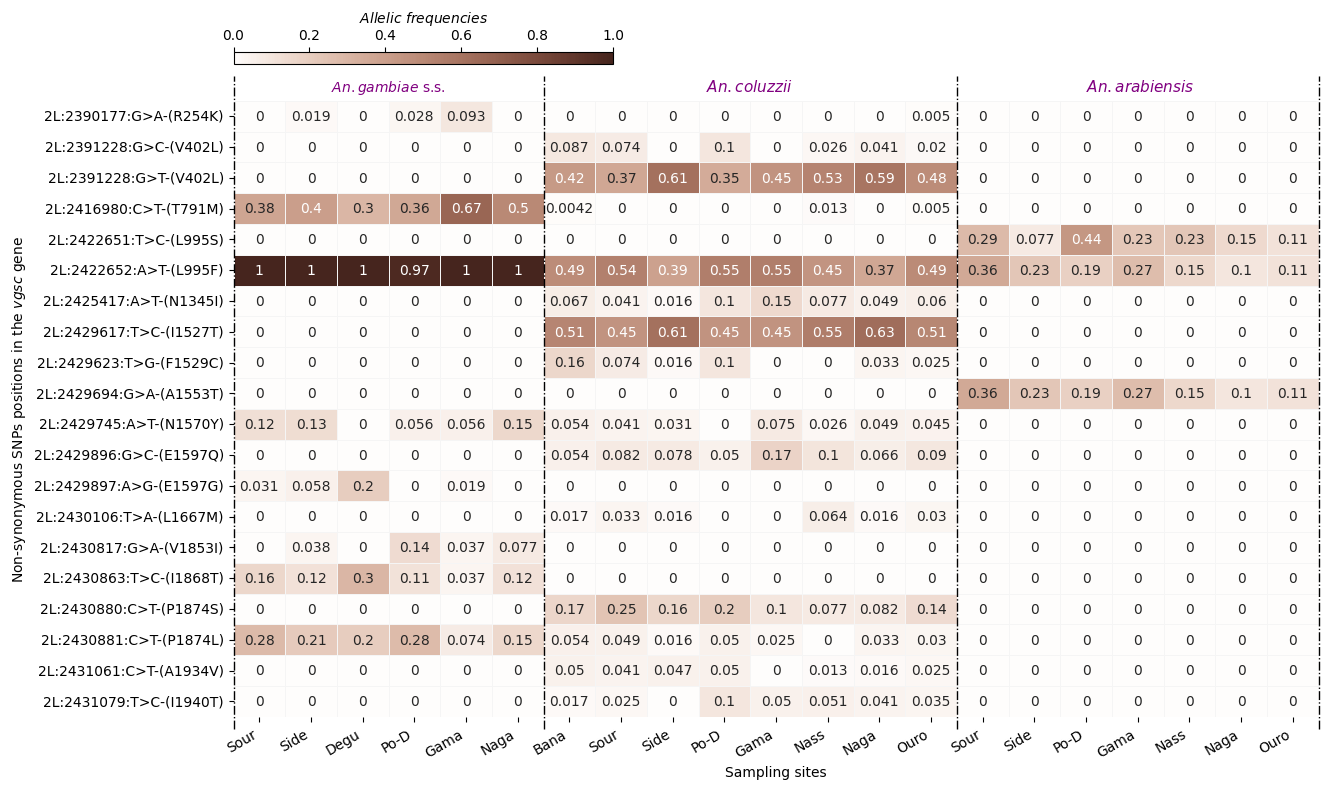

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(14, 8))
etl_df = etl.fromdataframe(df_vgsc_maxaf1)
col_list = [name for name in df_vgsc_maxaf1.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig,rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

# plot
ax=sns.heatmap(df_vgsc_maxaf1[col_list], vmin=0, vmax=1, cmap=color_2, yticklabels=labels, linewidths=0.5,
               xticklabels=loc_list, linecolor="whitesmoke",annot=True, cbar=False)
#ax.set_title("Alternative alleles frequencies per population within the AGAP004050 gene")
plt.xticks(rotation=30, ha='right')

## line to separate samples
plt.axvline(x=0, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=6, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=14, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=21, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)

##Text
plt.text(3, -0.3, '$An. gambiae$'+' s.s.', ha = 'center', size=10, color='purple')
plt.text(9.15, -0.3, '$An. coluzzii$', size=11, color='purple')
plt.text(16.5, -0.3, '$An. arabiensis$', size=11, color='purple')



cax = inset_axes(ax, width="35%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.06, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$Allelic$ $frequencies$')

ax.set(xlabel="Sampling sites", ylabel = 'Non-synonymous SNPs positions in the $vgsc$ gene')

plt.show()

fig.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/freq_heatmap_sep1.png',dpi=300, bbox_inches='tight')

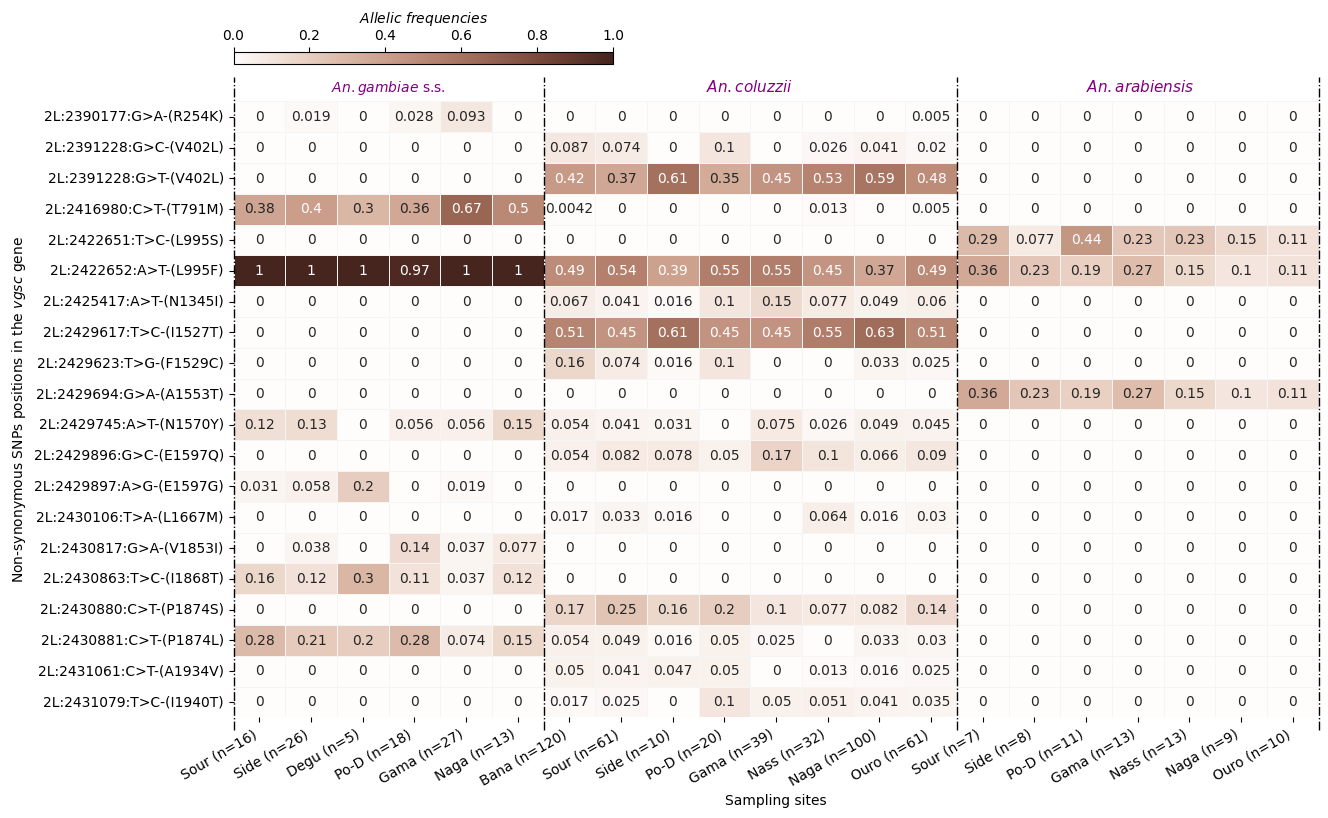

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(14, 8))
etl_df = etl.fromdataframe(df_vgsc_maxaf1)
col_list = [name for name in df_vgsc_maxaf1.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig,rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

# plot
ax=sns.heatmap(df_vgsc_maxaf1[col_list], vmin=0, vmax=1, cmap=color_2, yticklabels=labels, linewidths=0.5,
               xticklabels=loc_list1, linecolor="whitesmoke",annot=True, cbar=False)
#ax.set_title("Alternative alleles frequencies per population within the AGAP004050 gene")
plt.xticks(rotation=30, ha='right')

## line to separate samples
plt.axvline(x=0, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=6, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=14, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=21, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)

##Text
plt.text(3, -0.3, '$An. gambiae$'+' s.s.', ha = 'center', size=10, color='purple')
plt.text(9.15, -0.3, '$An. coluzzii$', size=11, color='purple')
plt.text(16.5, -0.3, '$An. arabiensis$', size=11, color='purple')



cax = inset_axes(ax, width="35%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.06, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$Allelic$ $frequencies$')

ax.set(xlabel="Sampling sites", ylabel = 'Non-synonymous SNPs positions in the $vgsc$ gene')

plt.show()

fig.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/freq_heatmap_sep.png',dpi=300, bbox_inches='tight')

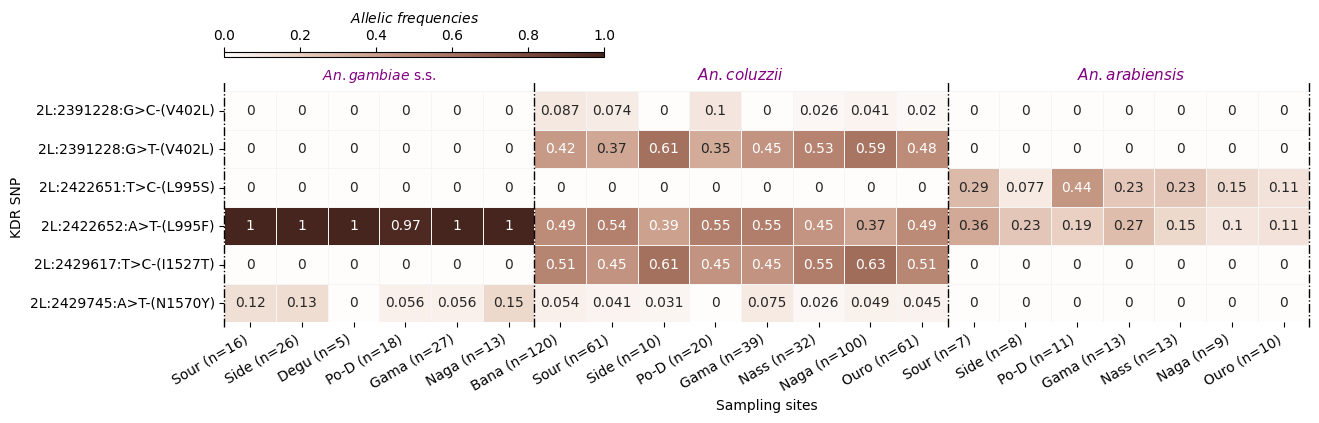

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(14, 3))
df_vgsc_maxaf11 = df_vgsc_maxaf1.query('aa_change in ["V402L","L995S","L995F","I1527T","N1570Y"]')
etl_df = etl.fromdataframe(df_vgsc_maxaf11)
col_list = [name for name in df_vgsc_maxaf11.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig,rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

# plot
ax=sns.heatmap(df_vgsc_maxaf11[col_list], vmin=0, vmax=1, cmap=color_2, yticklabels=labels, linewidths=0.5,
               xticklabels=loc_list1, linecolor="whitesmoke",annot=True, cbar=False)
#ax.set_title("Alternative alleles frequencies per population within the AGAP004050 gene")
plt.xticks(rotation=30, ha='right')

## line to separate samples
plt.axvline(x=0, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=6, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=14, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=21, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)

##Text
plt.text(3, -0.3, '$An. gambiae$'+' s.s.', ha = 'center', size=10, color='purple')
plt.text(9.15, -0.3, '$An. coluzzii$', size=11, color='purple')
plt.text(16.5, -0.3, '$An. arabiensis$', size=11, color='purple')



cax = inset_axes(ax, width="35%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.15, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$Allelic$ $frequencies$')

ax.set(xlabel="Sampling sites", ylabel = 'KDR SNP')

plt.show()

fig.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/freq_heatmap_sep_kdr.png',dpi=300, bbox_inches='tight')

In [ ]:
vi_df1 = df_vgsc_maxaf1.query('aa_change in ["V402L","I1527T"]')
col_list1 = [
    'aa_change', 'frq_Bana_col_2022', 'frq_Sour_col_2022',
    'frq_Sour_gam_2022', 'frq_Nass_col_2022', 'frq_Nass_ara_2022',
    'frq_Side_col_2022', 'frq_Side_gam_2022', 'frq_Po-D_ara_2022',
    'frq_Po-D_gam_2022', 'frq_Po-D_col_2022', 'frq_Gama_ara_2022',
    'frq_Gama_col_2022', 'frq_Gama_gam_2022', 'frq_Ouro_col_2022',
    'frq_Ouro_ara_2022', 'frq_Naga_gam_2022', 'frq_Naga_col_2022'
]
vi_df = vi_df1[col_list1].set_index('aa_change').T
vi_df.columns=['V402L(G>C)', 'V402L(G>T)', 'I1527T']
vi_df['V402L'] = vi_df['V402L(G>C)'] + vi_df['V402L(G>T)']
#vi_df['fdiff'] = vi_df['I1527T'] - vi_df['V402L']
vi_df.query('I1527T>0')

,V402L(G>C),V402L(G>T),I1527T,V402L
frq_Bana_col_2022,0.087500,0.425000,0.512500,0.512500
frq_Sour_col_2022,0.073770,0.368852,0.450820,0.442623
frq_Nass_col_2022,0.000000,0.609375,0.609375,0.609375
frq_Side_col_2022,0.100000,0.350000,0.450000,0.450000
frq_Po-D_col_2022,0.000000,0.450000,0.450000,0.450000
frq_Gama_col_2022,0.025641,0.525641,0.551282,0.551282
frq_Ouro_col_2022,0.040984,0.590164,0.631148,0.631148
frq_Naga_col_2022,0.020000,0.485000,0.510000,0.505000


In [ ]:
#df_vgsc_maxaf.to_excel('drive/MyDrive/sanger_analyses/resistance/VGSC/data/df_vgsc_maxaf.xlsx')

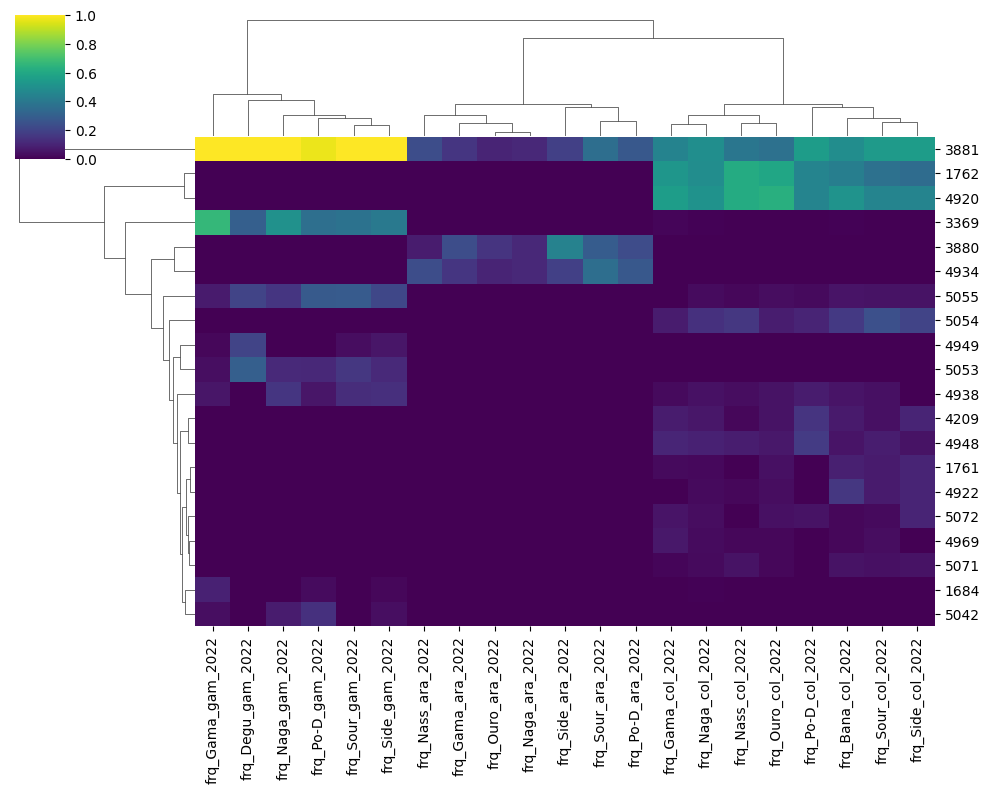

In [ ]:
gax=sns.clustermap(df_vgsc_maxaf1[col_list], cmap='viridis', method='average', metric='euclidean',
               linecolor="whitesmoke", figsize=(10, 8))
plt.show()

<Figure size 1000x800 with 0 Axes>

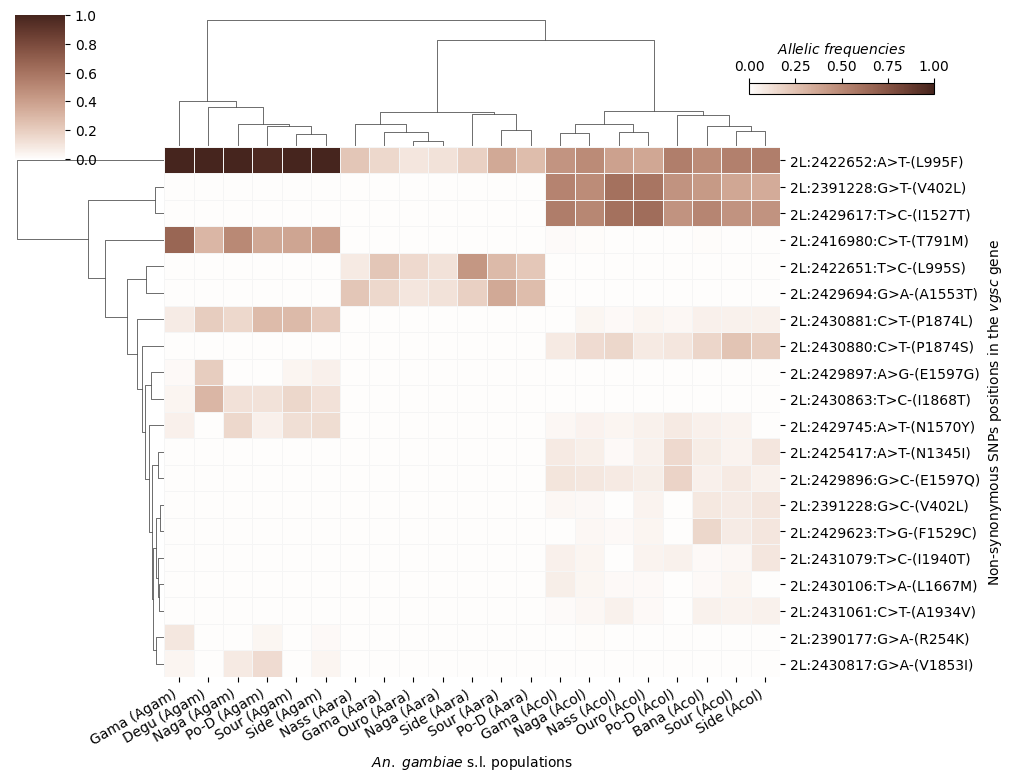

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig= plt.figure(figsize=(10, 8))
etl_df = etl.fromdataframe(df_vgsc_maxaf1)
col_list = [name for name in df_vgsc_maxaf1.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig,rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

#clustermap
dax=sns.clustermap(df_vgsc_maxaf1[col_list], cmap=color_2, method='average', metric='euclidean',
                   yticklabels=labels,linewidths=0.5, xticklabels=[coh_labs[key.split('frq_')[1]] for key in col_list],
                   linecolor="whitesmoke",  figsize=(10, 8))
#costumize clustermap
dax.ax_heatmap.set_xticklabels(dax.ax_heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')

cax = inset_axes(dax.ax_heatmap, width="30%", height="2%", loc='lower left', bbox_to_anchor=(0.95, 1.1, 1, 1),
                 bbox_transform=dax.ax_heatmap.transAxes,borderpad=0)

mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,label='$Allelic$ $frequencies$')

dax.ax_heatmap.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'Non-synonymous SNPs positions in the $vgsc$ gene')

plt.show()

method='average', metric='euclidean'

<Figure size 1000x800 with 0 Axes>

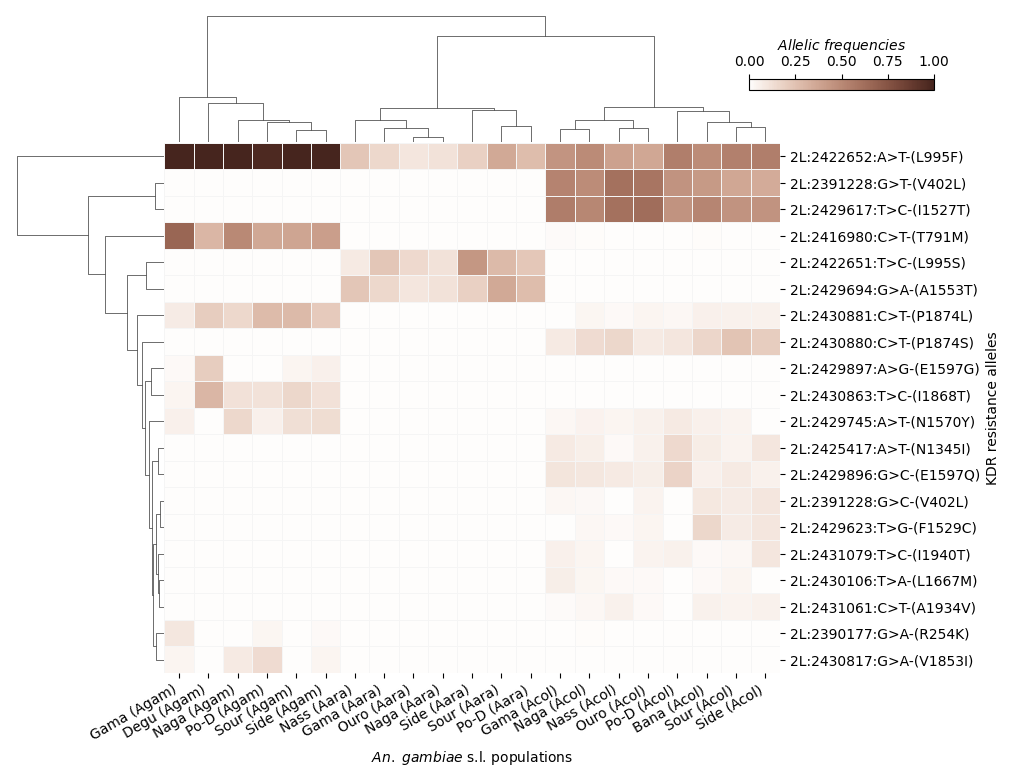

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig= plt.figure(figsize=(10, 8))
etl_df = etl.fromdataframe(df_vgsc_maxaf1)
col_list = [name for name in df_vgsc_maxaf1.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig,rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

#clustermap
dax=sns.clustermap(df_vgsc_maxaf1[col_list], cmap=color_2, method='average', metric='euclidean',
                   yticklabels=labels,linewidths=0.5, xticklabels=[coh_labs[key.split('frq_')[1]] for key in col_list],
                   linecolor="whitesmoke", cbar_kws={'label':'Allelic frequencies'}, figsize=(10, 8))
#costumize clustermap
dax.cax.set_visible(False)
dax.ax_heatmap.set_xticklabels(dax.ax_heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')

cax = inset_axes(dax.ax_heatmap, width="30%", height="2%", loc='lower left', bbox_to_anchor=(0.95, 1.1, 1, 1),
                 bbox_transform=dax.ax_heatmap.transAxes,borderpad=0)

mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,label='$Allelic$ $frequencies$')

dax.ax_heatmap.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'KDR resistance alleles')

plt.show()
dax.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/freq_clustermap_ecludian.png',dpi=300, bbox_inches='tight')

<Figure size 1000x800 with 0 Axes>

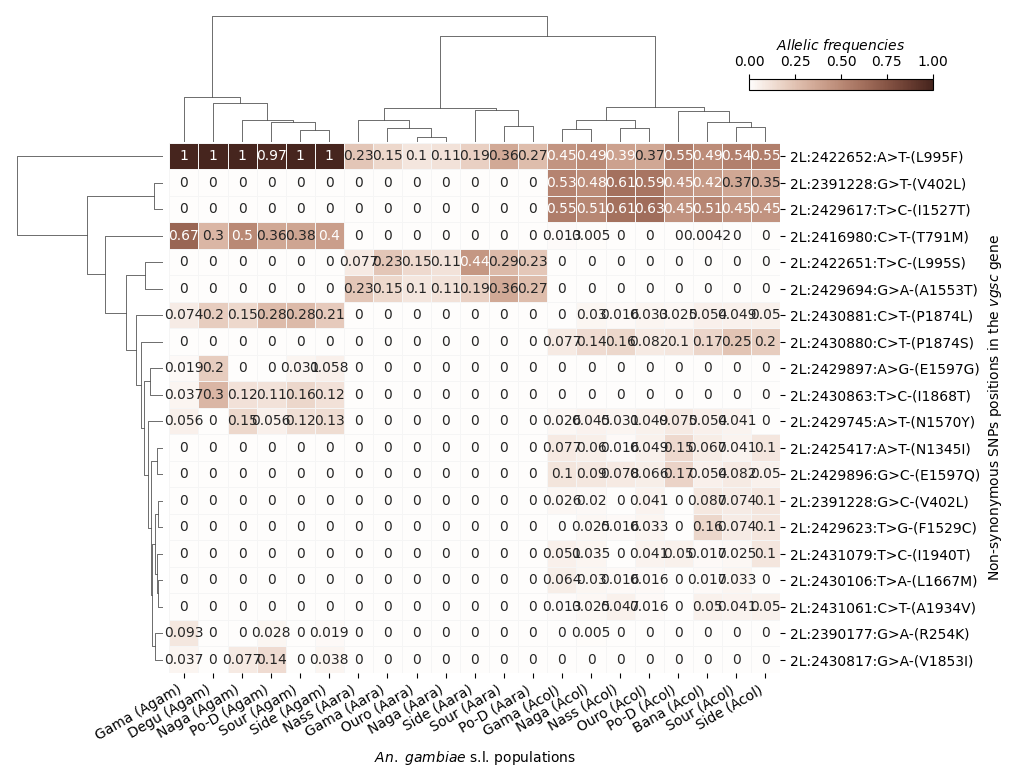

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig= plt.figure(figsize=(10, 8))
etl_df = etl.fromdataframe(df_vgsc_maxaf1)
col_list = [name for name in df_vgsc_maxaf1.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig,rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

#clustermap
dax=sns.clustermap(df_vgsc_maxaf1[col_list], cmap=color_2, method='average', metric='euclidean',
                   yticklabels=labels,linewidths=0.5, xticklabels=[coh_labs[key.split('frq_')[1]] for key in col_list],
                   linecolor="whitesmoke", cbar_kws={'label':'Allelic frequencies'},annot=True,
                   figsize=(10, 8))
#costumize clustermap
dax.cax.set_visible(False)
dax.ax_heatmap.set_xticklabels(dax.ax_heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')

cax = inset_axes(dax.ax_heatmap, width="30%", height="2%", loc='lower left', bbox_to_anchor=(0.95, 1.1, 1, 1),
                 bbox_transform=dax.ax_heatmap.transAxes,borderpad=0)

mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,
                          label='$Allelic$ $frequencies$', )

dax.ax_heatmap.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'Non-synonymous SNPs positions in the $vgsc$ gene')

plt.show()
#dax.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/freq_clustermap_ecludian.png',dpi=300, bbox_inches='tight')

method='average', metric='Cityblock'

<Figure size 1000x800 with 0 Axes>

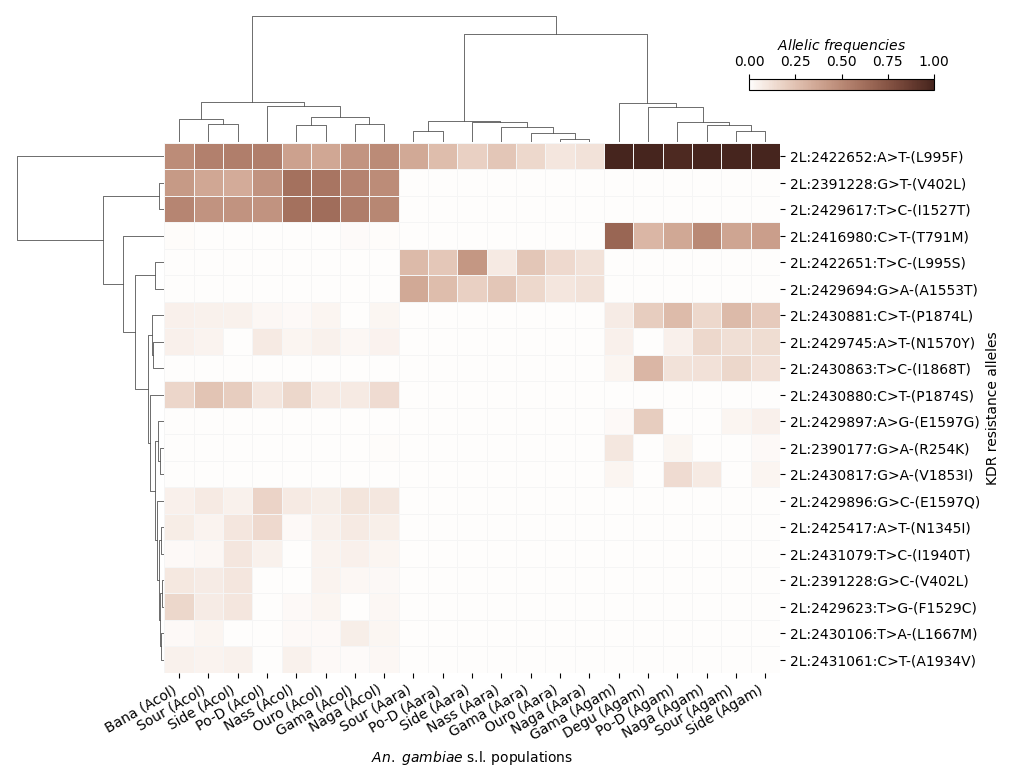

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig= plt.figure(figsize=(10, 8))
etl_df = etl.fromdataframe(df_vgsc_maxaf1)
col_list = [name for name in df_vgsc_maxaf1.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig,rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

#clustermap
dax=sns.clustermap(df_vgsc_maxaf1[col_list], cmap=color_2, method='average', metric='Cityblock',
                   yticklabels=labels,linewidths=0.5, xticklabels=[coh_labs[key.split('frq_')[1]] for key in col_list],
                   linecolor="whitesmoke", cbar_kws={'label':'Allelic frequencies'},
                   figsize=(10, 8))
#costumize clustermap
dax.cax.set_visible(False)
dax.ax_heatmap.set_xticklabels(dax.ax_heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')

cax = inset_axes(dax.ax_heatmap, width="30%", height="2%", loc='lower left', bbox_to_anchor=(0.95, 1.1, 1, 1),
                 bbox_transform=dax.ax_heatmap.transAxes,borderpad=0)

mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,
                          label='$Allelic$ $frequencies$', )

dax.ax_heatmap.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'KDR resistance alleles')

plt.show()
dax.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/freq_clustermap_cityblock.png',dpi=300, bbox_inches='tight')

## Sankey Plot

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["L995F", "N1570Y","I1527T","V402L","coluzzii","Bana village","Gama","Nagare","Nassan","Ouro-Hesso","Po-Dongo","Sidera","Sourouk"],
      color = "gray"
    ),
    link = dict(
      source = [0,4,4,4,4,4,4,4,4,1,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [4,5,6,7,8,9,10,11,12,4,5,6,7,8,9,10,11,12,4,5,6,7,8,9,10,11,12,4,5,6,7,8,9,10,11,12],
      value = [419,117,35,98,25,45,22,11,66,40,13,2,9,2,6,3,0,5,466,123,43,102,39,77,18,9,55,464,123,43,101,39,77,18,9,54],
      color = ["goldenrod", "goldenrod",  "goldenrod", "goldenrod", "goldenrod","goldenrod","goldenrod","goldenrod","goldenrod",
               "violet","violet", "violet", "violet", "violet", "violet", "violet", "violet","violet",
               "lightseagreen","lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen","lightseagreen",
               "chocolate","chocolate", "chocolate", "chocolate", "chocolate", "chocolate", "chocolate", "chocolate","chocolate",
               "steelblue","steelblue", "steelblue", "steelblue", "steelblue", "steelblue", "steelblue", "steelblue", "steelblue"
               ]
  ))])

fig.update_layout(title_text="Sankey Diagram showing KDR variants frequency", font_size=10)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 30,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label = ["L995F","L995S","N1570Y","I1527T","V402L","arabiensis","coluzzii","gambiae",
               "Bana village","Gama","Nagare","Nassan","Ouro-Hesso","Po-Dongo","Sidera","Sourouk"],
      color = "gray"
    ),
    link = dict(
      source = [0,5,5,5,5,1,5,5,5,5,2,5,5,5,5,3,5,5,5,5,4,5,5,5,5,
                0,6,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,2,6,6,6,6,6,6,6,6,3,6,6,6,6,6,6,6,6,4,6,6,6,6,6,6,6,6,
                0,7,7,7,7,7,1,7,7,7,7,7,2,7,7,7,7,7,3,7,7,7,7,7,4,7,7,7,7,7], # indices correspond to labels
      target = [5,9,11,12,13,5,9,11,12,13,5,9,11,12,13,5,9,11,12,13,5,9,11,12,13,
                6,8,9,10,11,12,13,14,15,6,8,9,10,11,12,13,14,15,6,8,9,10,11,12,13,14,15,6,8,9,10,11,12,13,14,15,6,8,9,10,11,12,13,14,15,
                7,9,10,13,14,15,7,9,10,13,14,15,7,9,10,13,14,15,7,9,10,13,14,15,7,9,10,13,14,15],
      value = [18,4,6,2,6,16,6,2,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               419,117,35,98,25,45,22,11,66,0,0,0,0,0,0,0,0,0,40,13,2,9,2,6,3,0,5,466,123,43,102,39,77,18,9,55,464,123,43,101,39,77,18,9,54,
               199,54,26,35,52,32,0,0,0,0,0,0,20,3,4,2,7,4,0,0,0,0,0,0,0,0,0,0,0,0],
      color = ["goldenrod", "goldenrod",  "goldenrod", "goldenrod", "goldenrod","violet","violet", "violet", "violet", "violet",
               "lightseagreen","lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen",
               "chocolate","chocolate", "chocolate", "chocolate", "chocolate",
               "steelblue","steelblue", "steelblue", "steelblue", "steelblue",
               "goldenrod", "goldenrod",  "goldenrod", "goldenrod", "goldenrod","goldenrod","goldenrod","goldenrod","goldenrod",
               "violet","violet", "violet", "violet", "violet", "violet", "violet", "violet","violet",
               "lightseagreen","lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen","lightseagreen",
               "chocolate","chocolate", "chocolate", "chocolate", "chocolate", "chocolate", "chocolate", "chocolate","chocolate",
               "steelblue","steelblue", "steelblue", "steelblue", "steelblue","steelblue", "steelblue", "steelblue", "steelblue",
               "goldenrod", "goldenrod",  "goldenrod", "goldenrod", "goldenrod","goldenrod",
               "violet","violet", "violet", "violet", "violet", "violet",
               "lightseagreen","lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen",
               "chocolate","chocolate", "chocolate", "chocolate", "chocolate", "chocolate",
               "steelblue","steelblue", "steelblue", "steelblue", "steelblue", "steelblue"
               ]

  ))])

fig.update_layout(title_text="Sankey Diagram showing KDR variants frequency, species distribution", font_size=10)
fig.show()

In [ ]:
import plotly.graph_objects as go

fig_sk = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 30,
      thickness = 20,
      line = dict(color = "gray", width = 0.5),
      label = ["L995F","L995S","N1570Y","I1527T","V402L","An. arabiensis","An. coluzzii","An. gambiae",
               "Bana village","Gama","Nagare","Nassan","Ouro-Hesso","Po-Dongo","Sideradougou","Souroukoudinga"],
      color = "gray"
    ),
    link = dict(
      source = [0,5,5,5,5,1,5,5,5,5,2,5,5,5,5,3,5,5,5,5,4,5,5,5,5,
                0,6,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,2,6,6,6,6,6,6,6,6,3,6,6,6,6,6,6,6,6,4,6,6,6,6,6,6,6,6,
                0,7,7,7,7,7,1,7,7,7,7,7,2,7,7,7,7,7,3,7,7,7,7,7,4,7,7,7,7,7], # indices correspond to labels
      target = [5,9,11,12,13,5,9,11,12,13,5,9,11,12,13,5,9,11,12,13,5,9,11,12,13,
                6,8,9,10,11,12,13,14,15,6,8,9,10,11,12,13,14,15,6,8,9,10,11,12,13,14,15,6,8,9,10,11,12,13,14,15,6,8,9,10,11,12,13,14,15,
                7,9,10,13,14,15,7,9,10,13,14,15,7,9,10,13,14,15,7,9,10,13,14,15,7,9,10,13,14,15],
      value = [18,4,6,2,6,16,6,2,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               419,117,35,98,25,45,22,11,66,0,0,0,0,0,0,0,0,0,40,13,2,9,2,6,3,0,5,466,123,43,102,39,77,18,9,55,464,123,43,101,39,77,18,9,54,
               199,54,26,35,52,32,0,0,0,0,0,0,20,3,4,2,7,4,0,0,0,0,0,0,0,0,0,0,0,0],
      color = ["goldenrod", "goldenrod",  "goldenrod", "goldenrod", "goldenrod","violet","violet", "violet", "violet", "violet",
               "lightseagreen","lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen",
               "chocolate","chocolate", "chocolate", "chocolate", "chocolate",
               "steelblue","steelblue", "steelblue", "steelblue", "steelblue",
               "goldenrod", "goldenrod",  "goldenrod", "goldenrod", "goldenrod","goldenrod","goldenrod","goldenrod","goldenrod",
               "violet","violet", "violet", "violet", "violet", "violet", "violet", "violet","violet",
               "lightseagreen","lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen","lightseagreen",
               "chocolate","chocolate", "chocolate", "chocolate", "chocolate", "chocolate", "chocolate", "chocolate","chocolate",
               "steelblue","steelblue", "steelblue", "steelblue", "steelblue","steelblue", "steelblue", "steelblue", "steelblue",
               "goldenrod", "goldenrod",  "goldenrod", "goldenrod", "goldenrod","goldenrod",
               "violet","violet", "violet", "violet", "violet", "violet",
               "lightseagreen","lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen", "lightseagreen",
               "chocolate","chocolate", "chocolate", "chocolate", "chocolate", "chocolate",
               "steelblue","steelblue", "steelblue", "steelblue", "steelblue", "steelblue"
               ]

  ))])

fig_sk.update_layout(title_text="KDR alleles frequencies, species distribution", font_size=12)
fig_sk.show()

In [ ]:
img_bytes=fig_sk.to_image(format="png", width=800, height=350, scale=2)
open_img = PIL.Image.open(io.BytesIO(img_bytes))
open_img.save('drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/Freq_sankey_map.png', format='png',dpi=(300,300))

## Ace gene

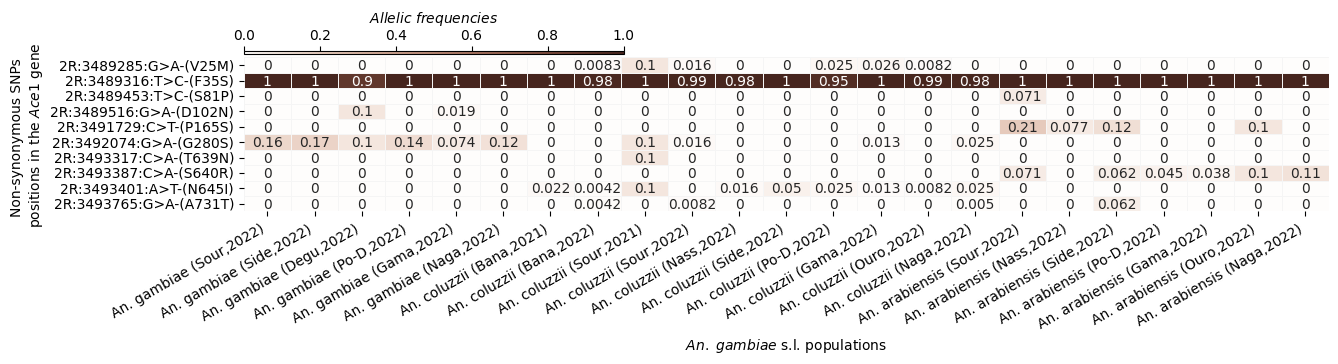

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig= plt.figure(figsize=(14, 2))
etl_df = etl.fromdataframe(df_ace1_maxaf)
col_list = [name for name in df_ace1_maxaf.columns if name.startswith('frq_')]
col_list.sort(key=lambda x: x.split('_')[2], reverse=True)
labels = ['%s:%s:%s>%s-(%s)' % (rec.contig, rec.position, rec.ref_allele, rec.alt_allele, rec.aa_change) for rec in etl_df.records()]

# plot
ax=sns.heatmap(df_ace1_maxaf[col_list], vmin=0, vmax=1, cmap=color_2, yticklabels=labels, linewidths=0.5,
               xticklabels=[coh_labels[key.split('frq_')[1]] for key in col_list], linecolor="whitesmoke",annot=True, cbar=False)
#ax.set_title("Alternative alleles frequencies per population within the AGAP004050 gene")
plt.xticks(rotation=30, ha='right')

cax = inset_axes(ax, width="35%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax, orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$Allelic$ $frequencies$')

ax.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'Non-synonymous SNPs \npositions in the $Ace1$ gene')
plt.show()

## Data warping

In [ ]:
df_events_vgsc1=df_events_vgsc.copy()
#df_samples=ag3.sample_metadata(sample_sets='3.11', sample_query='country=="Burkina Faso"')
df_items = df_samples.groupby(['location','latitude','longitude']).size()
lon_lat = {}
for key in df_items.to_dict().keys():
  lon_lat[key[0]]=key[1:]
latitude, longitude = [],[]
df_events_vgsc1=df_events_vgsc1.sort_values(by='area')
for zone in df_events_vgsc1.area.unique():
  if zone in lon_lat.keys():
    print(True, zone,lon_lat[zone][0],lon_lat[zone][1])
  else:
    print(False)
  for z in [itex for itex in range(df_events_vgsc1.query(f'area=="{zone}"').shape[0])]:
    latitude.append(lon_lat[zone][0])
    longitude.append(lon_lat[zone][1])
print(len(latitude),len(longitude), df_events_vgsc1.shape)
df_events_vgsc1['lat']=latitude
df_events_vgsc1['lon']=longitude
df_events_vgsc1['aa_change'] = [var.split(' ')[0] for var in df_events_vgsc1.variant]

True Bana Village 11.233 -4.472
True Gama 12.003 1.762
True Nagare 12.927 -0.142
True Nassan 13.028 -3.014
True Ouro-Hesso 14.375 -0.128
True Po-Dongo 11.219 -1.02
True Sideradougou 10.678 -4.256
True Souroukoudinga 11.235 -4.535
13284 13284 (13284, 14)


In [ ]:
df_events_ace11=df_events_ace1.copy()
#df_samples=ag3.sample_metadata(sample_sets='3.11', sample_query='country=="Burkina Faso"')
df_items = df_samples.groupby(['location','latitude','longitude']).size()
lon_lat = {}
for key in df_items.to_dict().keys():
  lon_lat[key[0]]=key[1:]
latitude, longitude = [],[]
df_events_ace1=df_events_ace11.sort_values(by='area')
for zone in df_events_ace11.area.unique():
  if zone in lon_lat.keys():
    print(True, zone,lon_lat[zone][0],lon_lat[zone][1])
  else:
    print(False)
  for z in [itex for itex in range(df_events_ace11.query(f'area=="{zone}"').shape[0])]:
    latitude.append(lon_lat[zone][0])
    longitude.append(lon_lat[zone][1])
print(len(latitude),len(longitude), df_events_ace11.shape)
df_events_ace11['lat']=latitude
df_events_ace11['lon']=longitude
df_events_ace11['aa_change'] = [var.split(' ')[0] for var in df_events_ace11.variant]

True Gama 12.003 1.762
True Nassan 13.028 -3.014
True Ouro-Hesso 14.375 -0.128
True Po-Dongo 11.219 -1.02
True Bana Village 11.233 -4.472
True Nagare 12.927 -0.142
True Sideradougou 10.678 -4.256
True Souroukoudinga 11.235 -4.535
2556 2556 (2556, 14)


In [ ]:
df_hap = df_haps.copy()
#df_samples=ag3.sample_metadata(sample_sets='3.11', sample_query='country=="Burkina Faso"')
df_items = df_samples.groupby(['location','latitude','longitude']).size()
lon_lat = {}
for key in df_items.to_dict().keys():
  lon_lat[key[0][:4]]=key[1:]
latitude, longitude = [],[]
df_hap=df_hap.sort_values(by='key_1')
for zone in df_hap.key_1.unique():
  if zone in lon_lat.keys():
    print(True, zone,lon_lat[zone][0],lon_lat[zone][1])
  else:
    print(False)
  for z in [itex for itex in range(df_hap.query(f'key_1=="{zone}"').shape[0])]:
    latitude.append(lon_lat[zone][0])
    longitude.append(lon_lat[zone][1])
print(len(latitude),len(longitude), df_hap.shape)
df_hap['lat']=latitude
df_hap['lon']=longitude
df_hap['population'] = [i.split('frq_')[1] for i in df_hap.populations]

True Bana 11.233 -4.472
True Degu 10.711 -4.326
True Gama 12.003 1.762
True Naga 12.927 -0.142
True Nass 13.028 -3.014
True Ouro 14.375 -0.128
True Po-D 11.219 -1.02
True Side 10.678 -4.256
True Sour 11.235 -4.535
12430 12430 (12430, 32)


In [ ]:
vars = ['V402L (2L:2,391,228 G>{C,T})','I1527T (2L:2,429,617 T>C)','L995F (2L:2,422,652 A>T)','L995S (2L:2,422,651 T>C)','N1570Y (2L:2,429,745 A>T)']
df_query1 = df_events_vgsc1.query(f"period == 2022 and variant=={vars}")

In [ ]:
xticks = ['Bana', 'Cama', 'Nagare','Nassan', 'Ouoro-Hesso','Po-Dongo','Sideradougou','Souroukoudinga']

In [ ]:
fig1 = px.bar(data_frame=df_query1.query('taxon=="coluzzii" and frequency>0').sort_values(by='populations',ascending=True),height=450, width=900,
              template='plotly_white',x='area',y="frequency", error_y="frequency_error",error_y_minus="frequency_error_minus",
              color='variant', barmode='group', title="AGAP004707-RD (Vgsc/para) SNP frequencies in An. coluzzii",
              labels={"area": 'Sampling sites', "frequency": 'allele frequencies', "variant":'Genetic variants'})
fig1.update_layout(xaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='black'),
                   yaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='gray'))
fig1.update_yaxes(range=[0, 1.0], ticks="outside", col=1)
fig1.update_xaxes(tickangle= -35, showline=True, linewidth=0.25, linecolor='black', ticks="outside")

In [ ]:
fig2 = px.bar(data_frame=df_query1.query('taxon=="gambiae" and frequency>0').sort_values(by='populations',ascending=True),height=450, width=600,
              template='plotly_white',x='area',y="frequency", error_y="frequency_error",error_y_minus="frequency_error_minus",
              color='variant', barmode='group', title="AGAP004707-RD (Vgsc/para) SNP frequencies in An. gambiae s.s.",
              labels={"area": 'Sampling sites', "frequency": 'allele frequencies', "variant":'Genetic variants'})
fig2.update_layout(xaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='black'),
                   yaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='gray'))
fig2.update_yaxes(range=[0, 1.0], ticks="outside", col=1)
fig2.update_xaxes(tickangle= -35, showline=True, linewidth=0.25, linecolor='black', ticks="outside")

In [ ]:
fig3 = px.bar(data_frame=df_query1.query('taxon=="arabiensis" and frequency>0').sort_values(by='populations',ascending=True),height=450, width=600,
              template='plotly_white',x='area',y="frequency", error_y="frequency_error",error_y_minus="frequency_error_minus",
              color='variant', barmode='group', title="AGAP004707-RD (Vgsc/para) SNP frequencies in An. arabiensis",
              labels={"area": 'Sampling sites', "frequency": 'allele frequencies', "variant":'Genetic variants'})
fig3.update_layout(xaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='black'),
                   yaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='gray'))
fig3.update_yaxes(range=[0, 1.0], ticks="outside", col=1)
fig3.update_xaxes(tickangle= -35, showline=True, linewidth=0.25, linecolor='black', ticks="outside")


In [ ]:
#df_query1

In [ ]:
df_query2 = df_events_ace11.query("period == 2022 and variant=='G280S (2R:3,492,074 G>A)'")
#df_query2

In [ ]:
fig4 = px.bar(data_frame=df_query2.query('frequency>0').sort_values(by='populations',ascending=True),height=450, width=600,
              template='plotly_white',x='area',y="frequency", error_y="frequency_error",error_y_minus="frequency_error_minus",
              color='taxon', barmode='group', title="G280S (2R:3,492,074 G>A) frequencies",
              labels={"area": 'Sampling sites', "frequency": 'allele frequencies', "taxon":'Species'})
fig4.update_layout(xaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='black'),
                   yaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='gray'))
fig4.update_yaxes(range=[0, 1.0], ticks="outside", col=1)
fig4.update_xaxes(tickangle= -35, showline=True, linewidth=0.25, linecolor='black', ticks="outside")

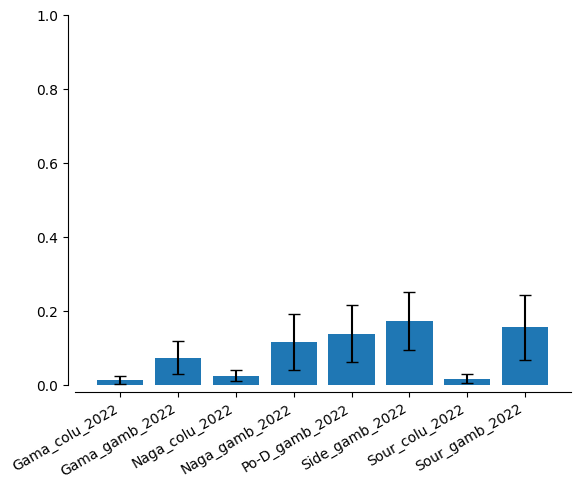

In [ ]:
df_data = df_query2.query('frequency>0').sort_values(by='populations',ascending=True)
fig, ax = plt.subplots()
sns.despine(ax=ax, bottom=False, top = True, offset=5)

#plot
ax.bar(x=df_data.populations,height=df_data.frequency, yerr=df_data.frequency_error_minus, capsize=4)
ax.set_ylim(0,1)
plt.xticks(rotation=30, ha='right')
plt.show()

## Mapping

In [ ]:
#df_query2

In [ ]:
####
df_data = df_query2.copy()#query('frequency>0').sort_values(by='populations',ascending=True)
#df_data
df_selected_ace = pd.pivot_table(df_data, values=['count'], columns=['aa_change'], index=['populations','area','period','taxon','lat','lon','nobs']).droplevel(0, axis=1).reset_index()
#df_selected_ace_v = pd.pivot_table(df_data, values=['count'], columns=['aa_change'], index=['area','lat','lon','nobs']).droplevel(0, axis=1).reset_index()
df_selected_ace.set_index('populations', inplace=True)
#df_selected_ace_v.set_index('area', inplace=True)
df_selected_ace.to_excel(f'{path}/map/df_ace_G280S.xlsx')

In [ ]:
vars = ['V402L (2L:2,391,228 G>{C,T})','I1527T (2L:2,429,617 T>C)','L995F (2L:2,422,652 A>T)','L995S (2L:2,422,651 T>C)','N1570Y (2L:2,429,745 A>T)']
var_label = []
for vx in vars:
  var_label.append(vx.split(' ')[0])
df_vgsc_select = df_events_vgsc1.query(f"period == 2022 and variant=={vars}")

In [ ]:
df_selected = pd.pivot_table(df_vgsc_select, values=['count'], columns=['aa_change'], index=['populations','area','taxon','lat','lon','nobs']).droplevel(0, axis=1).reset_index()
df_selected_v = pd.pivot_table(df_vgsc_select, values=['count'], columns=['aa_change'], index=['area','lat','lon','nobs']).droplevel(0, axis=1).reset_index()
df_selected.set_index('populations', inplace=True)
#df_selected_v.set_index('area', inplace=True)
#df_selected#.columns

In [ ]:
#df_selected

In [ ]:
list(df_samples.haplo_id.unique())

['FVI/FVI', 'OD', 'FL1T/LVI', 'LL1T/LL1T', 'LL1T/LL2T', 'FL2T/LVI']

In [ ]:
df_samples['area_lab'] = df_samples.location.map(area_lab)
df_samples['haplo_id'] = df_samples.sample_id.map(map_dict)

In [ ]:
df_haplo = df_samples.pivot_table(index=['location','latitude','longitude','year','aim_species'], columns='haplo_id', aggfunc='size').reset_index().fillna(0)
#df_haplo.set_index('location', inplace=True)
df_haplo['nobs'] = df_haplo[['FVI/FVI', 'OD', 'FL1T/LVI', 'LL1T/LL1T', 'LL1T/LL2T', 'FL2T/LVI']].sum(axis=1)
df_haplo = df_haplo[['location', 'latitude', 'longitude', 'year', 'aim_species','nobs', 'FVI/FVI','FL1T/LVI', 'LL1T/LL1T', 'LL1T/LL2T', 'FL2T/LVI', 'OD']]

########
offset_lat = {'Bana Village':0.32, 'Degue-Degue':0.3 ,'Gama':0.4, 'Nagare':0.25,
              'Nassan':0.12, 'Ouro-Hesso':0.6, 'Po-Dongo':0.35, 'Sideradougou':0.53,
              'Souroukoudinga':0.25}
offset_lon = {'Bana Village':1.2, 'Degue-Degue':1.25, 'Gama':-0.25, 'Nagare':0.5,
              'Nassan':0.5, 'Ouro-Hesso':-0.6, 'Po-Dongo':-0.3, 'Sideradougou':-0.35,
              'Souroukoudinga':-1.2}
df_haplo['offset_lat'] = [offset_lat[i] for i in df_haplo.location]
df_haplo['offset_lon'] = [offset_lon[i] for i in df_haplo.location]

In [ ]:
#df_haplo.head()

## merge table by genotype

## Anopheles coluzzii table - six genotype groups

In [ ]:
## Anopheles coluzzii table - six genotype groups
pd.set_option("display.max_rows", None, "display.max_columns", 30)
df_haplo_col = df_haplo.query('aim_species=="coluzzii" and year >2021')

#'FVI/FVI', 'OD', 'FL1T/LVI', 'LL1T/LL1T', 'LL1T/LL2T', 'FL2T/LVI'

###
df_haplo_col.insert(7, 'tx_FVI/FVI',df_haplo_col['FVI/FVI']/df_haplo_col['nobs'],allow_duplicates=False)
df_haplo_col.insert(8, 'se_FVI/FVI', np.sqrt(df_haplo_col['tx_FVI/FVI']*(1-df_haplo_col['tx_FVI/FVI'])/df_haplo_col['nobs']),allow_duplicates=False)

df_haplo_col.insert(10, 'tx_FL1T/LVI',df_haplo_col['FL1T/LVI']/df_haplo_col['nobs'],allow_duplicates=False)
df_haplo_col.insert(11, 'se_FL1T/LVI', np.sqrt(df_haplo_col['tx_FL1T/LVI']*(1-df_haplo_col['tx_FL1T/LVI'])/df_haplo_col['nobs']),allow_duplicates=False)

df_haplo_col.insert(13, 'tx_FL2T/LVI',df_haplo_col['FL2T/LVI']/df_haplo_col['nobs'],allow_duplicates=False)
df_haplo_col.insert(14, 'se_FL2T/LVI', np.sqrt(df_haplo_col['tx_FL2T/LVI']*(1-df_haplo_col['tx_FL2T/LVI'])/df_haplo_col['nobs']),allow_duplicates=False)

df_haplo_col.insert(16, 'tx_LL1T/LL1T',df_haplo_col['LL1T/LL1T']/df_haplo_col['nobs'],allow_duplicates=False)
df_haplo_col.insert(17, 'se_LL1T/LL1T', np.sqrt(df_haplo_col['tx_LL1T/LL1T']*(1-df_haplo_col['tx_LL1T/LL1T'])/df_haplo_col['nobs']),allow_duplicates=False)

df_haplo_col.insert(19, 'tx_LL1T/LL2T',df_haplo_col['LL1T/LL2T']/df_haplo_col['nobs'],allow_duplicates=False)
df_haplo_col.insert(20, 'se_LL1T/LL2T', np.sqrt(df_haplo_col['tx_LL1T/LL2T']*(1-df_haplo_col['tx_LL1T/LL2T'])/df_haplo_col['nobs']),allow_duplicates=False)

df_haplo_col.insert(22, 'tx_OD',df_haplo_col['OD']/df_haplo_col['nobs'],allow_duplicates=False)
df_haplo_col.insert(23, 'se_OD', np.sqrt(df_haplo_col['tx_OD']*(1-df_haplo_col['tx_OD'])/df_haplo_col['nobs']),allow_duplicates=False)

#df_haplo_col

In [ ]:
pd.reset_option('^display.', silent=True)
#'FVI/FVI', 'OD', 'FL1T/LVI', 'LL1T/LL1T', 'LL1T/LL2T', 'FL2T/LVI'
df_haplo_col_melt1 = pd.melt(df_haplo_col, id_vars=['location'], value_vars=['tx_FVI/FVI','tx_FL1T/LVI','tx_FL2T/LVI','tx_LL1T/LL1T','tx_LL1T/LL2T','tx_OD'],
                             value_name='geno_freq',var_name='diplo_id1')
df_haplo_col_melt2 = pd.melt(df_haplo_col, id_vars=['location'], value_vars=['se_FVI/FVI','se_FL1T/LVI','se_FL2T/LVI','se_LL1T/LL1T','se_LL1T/LL2T','se_OD'],
                             value_name='geno_se')
df_haplo_col_melt1['geno_se'] = df_haplo_col_melt2.geno_se
df_haplo_col_melt = df_haplo_col_melt1.copy()
df_haplo_col_melt.insert(2,'diplo_id',[id.split('_')[1] for id in df_haplo_col_melt['diplo_id1']],allow_duplicates=False)
#df_haplo_col_melt.drop(columns=['diplo_id1'], inplace=True)
df_haplo_col_melt

,location,diplo_id1,diplo_id,geno_freq,geno_se
0,Bana Village,tx_FVI/FVI,FVI/FVI,0.216667,0.037608
1,Degue-Degue,tx_FVI/FVI,FVI/FVI,0.000000,0.000000
2,Gama,tx_FVI/FVI,FVI/FVI,0.205128,0.064659
3,Nagare,tx_FVI/FVI,FVI/FVI,0.230000,0.042083
4,Nassan,tx_FVI/FVI,FVI/FVI,0.156250,0.064186
5,Ouro-Hesso,tx_FVI/FVI,FVI/FVI,0.180328,0.049225
6,Po-Dongo,tx_FVI/FVI,FVI/FVI,0.300000,0.102470
7,Sideradougou,tx_FVI/FVI,FVI/FVI,0.200000,0.126491
8,Souroukoudinga,tx_FVI/FVI,FVI/FVI,0.278689,0.057406
9,Bana Village,tx_FL1T/LVI,FL1T/LVI,0.458333,0.045485


In [ ]:
px.bar(data_frame=df_haplo_col_melt,height=450, width=900,template='plotly_white',
       x='location',y="geno_freq", error_y="geno_se",color='diplo_id', barmode='group')

## Anopheles gambiae s.l. table - six genotype groups

In [ ]:
df_haplo.columns

Index(['location', 'latitude', 'longitude', 'year', 'aim_species', 'nobs',
       'FVI/FVI', 'FL1T/LVI', 'LL1T/LL1T', 'LL1T/LL2T', 'FL2T/LVI', 'OD',
       'offset_lat', 'offset_lon'],
      dtype='object', name='haplo_id')

In [ ]:
## Anopheles coluzzii table - six genotype groups
df_haplo_all = df_haplo.query('year >2021')
df_haplo_all_melt = pd.melt(df_haplo_all, id_vars=['location','latitude','longitude','aim_species','nobs'],
                            value_vars=['FVI/FVI', 'FL1T/LVI', 'FL2T/LVI', 'LL1T/LL1T', 'LL1T/LL2T', 'OD'],
                            value_name='geno',var_name='diplo_id')
df_haplo_all_melt['geno_freq'] = df_haplo_all_melt['geno']/df_haplo_all_melt['nobs']
df_haplo_all_melt['geno_se'] = np.sqrt(df_haplo_all_melt['geno_freq']*(1-df_haplo_all_melt['geno_freq'])/df_haplo_all_melt['nobs'])
df_haplo_all_melt

,location,latitude,longitude,aim_species,nobs,diplo_id,geno,geno_freq,geno_se
0,Bana Village,11.233,-4.472,coluzzii,120.0,FVI/FVI,26.0,0.216667,0.037608
1,Bana Village,11.233,-4.472,gambiae,3.0,FVI/FVI,3.0,1.000000,0.000000
2,Bana Village,11.233,-4.472,intermediate_gambiae_coluzzii,1.0,FVI/FVI,1.0,1.000000,0.000000
3,Degue-Degue,10.711,-4.326,coluzzii,4.0,FVI/FVI,0.0,0.000000,0.000000
4,Degue-Degue,10.711,-4.326,gambiae,5.0,FVI/FVI,5.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
157,Sideradougou,10.678,-4.256,coluzzii,10.0,OD,0.0,0.000000,0.000000
158,Sideradougou,10.678,-4.256,gambiae,26.0,OD,0.0,0.000000,0.000000
159,Souroukoudinga,11.235,-4.535,arabiensis,7.0,OD,6.0,0.857143,0.132260
160,Souroukoudinga,11.235,-4.535,coluzzii,61.0,OD,3.0,0.049180,0.027687


In [ ]:
#hap_labels

In [ ]:
## Anopheles coluzzii table - six genotype groups
df_haplo_all_group = df_haplo_all_melt.copy().groupby(['aim_species','diplo_id']).agg({'nobs':'sum', 'geno':'sum'}).reset_index()
#df_haplo_all_group = df_haplo_all_melt.copy().groupby(['aim_species','diplo_id'])[['nobs',	'geno']].sum().reset_index()
df_haplo_all_group = df_haplo_all_group.query('aim_species in ["gambiae","arabiensis","coluzzii"]')
df_haplo_all_group['geno_freq'] = df_haplo_all_group['geno']/df_haplo_all_group['nobs']
df_haplo_all_group['geno_se'] = np.sqrt(df_haplo_all_group['geno_freq']*(1-df_haplo_all_group['geno_freq'])/df_haplo_all_group['nobs'])
df_haplo_all_group['diplo_labs'] = df_haplo_all_group.diplo_id.map(hap_labels)
df_haplo_all_group['taxon_lab'] = df_haplo_all_group.aim_species.map({'arabiensis':'Aara','coluzzii':'Acol','gambiae':'Agam'})
#df_haplo_all_group

In [ ]:
colors_diplo = {'995F+402V+1527I//995F+402V+1527I':'#069AF3',
                '995F+402L(g>t)+1527T//995L+402V+1527I':'#F97306',
                '995L+402L(g>t)+1527T//995L+402L(g>t)+1527T':'#9A0EEA',
                '995L+402L(g>t)+1527T//995L+402L(g>c)+1527T':'#A9561E',
                '995F+1527T/995L+1527I':'#FFD700' ,
                'Other diplotypes':'#06C2AC'}

In [ ]:
fig5 = px.bar(data_frame=df_haplo_all_group,height=360, width=900,template='plotly_white',
              x='taxon_lab',y="geno_freq", error_y="geno_se",color='diplo_labs', barmode='group',
              color_discrete_map=colors_diplo,
              labels={"taxon_lab": ' ', "geno_freq": 'Diplotye frequencies', "diplo_labs":'KDR diplotype groups'})
fig5.update_layout(xaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='black'),
                   yaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='gray'))
fig5.update_yaxes(range=[0, 1.0], ticks="outside", col=1)
fig5.update_xaxes(tickangle= -35, showline=True, linewidth=0.25, linecolor='black', ticks="outside")

In [ ]:
img_bytes=fig5.to_image(format="png", width=600, height=300, scale=2)
open_img = PIL.Image.open(io.BytesIO(img_bytes))
open_img.save('drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/diplo_freq.png', format='png',dpi=(300,300))

In [ ]:
fig6 = px.bar(data_frame=df_haplo_all_group.query("geno_freq>0"),height=360, width=900,template='plotly_white',
              x='taxon_lab',y="geno_freq", error_y="geno_se",color='diplo_labs', barmode='group',
              color_discrete_map=colors_diplo,
              labels={"taxon_lab": ' ', "geno_freq": 'Diplotye frequencies', "diplo_labs":'KDR diplotype groups'})
fig6.update_layout(xaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='black'),
                   yaxis=dict(showgrid=False, showline=True, linewidth=1, linecolor='gray'))
fig6.update_yaxes(range=[0, 1.0], ticks="outside", col=1)
fig6.update_xaxes(tickangle= -35, showline=True, linewidth=0.25, linecolor='black', ticks="outside")

In [ ]:
#df_haplo_all_melt

In [ ]:
## Anopheles coluzzii table - six genotype groups
#df_haplo_all = df_haplo.query('year >2021')

#df_haplo_all.insert(7, 'tx_FF/FF',df_haplo_all['FF/FF']/df_haplo_all['nobs'],allow_duplicates=False)
#df_haplo_all.insert(8, 'se_FF/FF', np.sqrt(df_haplo_all['tx_FF/FF']*(1-df_haplo_all['tx_FF/FF'])/df_haplo_all['nobs']),allow_duplicates=False)

#df_haplo_all.insert(10, 'tx_FLT/LVI',df_haplo_all['FLT/LVI']/df_haplo_all['nobs'],allow_duplicates=False)
#df_haplo_all.insert(11, 'se_FLT/LVI', np.sqrt(df_haplo_all['tx_FLT/LVI']*(1-df_haplo_all['tx_FLT/LVI'])/df_haplo_all['nobs']),allow_duplicates=False)

#df_haplo_all.insert(13, 'tx_FT/LI',df_haplo_all['FT/LI']/df_haplo_all['nobs'],allow_duplicates=False)
#df_haplo_all.insert(14, 'se_FT/LI', np.sqrt(df_haplo_all['tx_FT/LI']*(1-df_haplo_all['tx_FT/LI'])/df_haplo_all['nobs']),allow_duplicates=False)

#df_haplo_all.insert(16, 'tx_LT/LT',df_haplo_all['LT/LT']/df_haplo_all['nobs'],allow_duplicates=False)
#df_haplo_all.insert(17, 'se_LT/LT', np.sqrt(df_haplo_all['tx_LT/LT']*(1-df_haplo_all['tx_LT/LT'])/df_haplo_all['nobs']),allow_duplicates=False)

#df_haplo_all.insert(19, 'tx_LT/VT',df_haplo_all['LT/VT']/df_haplo_all['nobs'],allow_duplicates=False)
#df_haplo_all.insert(20, 'se_LT/VT', np.sqrt(df_haplo_all['tx_LT/VT']*(1-df_haplo_all['tx_LT/VT'])/df_haplo_all['nobs']),allow_duplicates=False)

#df_haplo_all.insert(22, 'tx_OD',df_haplo_all['OD']/df_haplo_all['nobs'],allow_duplicates=False)
#df_haplo_all.insert(23, 'se_OD', np.sqrt(df_haplo_all['tx_OD']*(1-df_haplo_all['tx_OD'])/df_haplo_all['nobs']),allow_duplicates=False)

#df_haplo_all

In [ ]:
#df_haplo_all_melt1 = pd.melt(df_haplo_all, id_vars=['location','latitude','longitude','aim_species','nobs'],
 #                            value_vars=['tx_FF/FF','tx_FLT/LVI','tx_FT/LI','tx_LT/LT','tx_LT/VT','tx_OD'],
  #                           value_name='geno_frq',var_name='diplo_id1')
#df_haplo_all_melt2 = pd.melt(df_haplo_all, id_vars=['location'], value_vars=['se_FF/FF','se_FLT/LVI','se_FT/LI','se_LT/LT','se_LT/VT','se_OD'],
#                             value_name='geno_se')

#df_haplo_all_melt1['geno_se'] = df_haplo_all_melt2.geno_se
#df_haplo_all_melt = df_haplo_all_melt1.copy()
#df_haplo_all_melt.insert(5,'diplo_id',[id.split('_')[1] for id in df_haplo_all_melt['diplo_id1']],allow_duplicates=False)

#df_haplo_all_group = df_haplo_all_melt.copy().groupby(['aim_species','diplo_id'])[['geno_frq',	'geno_se']].mean().reset_index()
#df_haplo_all_group = df_haplo_all_group.query('aim_species in ["gambiae","arabiensis","coluzzii"]')
#df_haplo_all_group

In [ ]:
#df_haplo_all_melt

In [ ]:
## save data for mapping
df_haplo.to_csv(f'{path}/map/df_haplo_saved.csv')
df_selected.to_csv(f'{path}/map/df_selected_saved.csv')
###
df_haplo.to_excel(f'{path}/map/df_haplo_saved.xlsx')
df_selected.to_excel(f'{path}/map/df_selected_saved.xlsx')

In [ ]:
#df_haplo

In [ ]:
df_selected_col = df_selected.query('taxon=="coluzzii"')
df_selected_col['coords_lat'] = [11.034, 12.103, 13.027, 13.128, 14.475, 11.319, 10.478, 11.336]
#df_selected_col

/tmp/ipython-input-1189919451.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(-0.5, 0, 'V402L'),
 Text(0.5, 0, 'I1527T'),
 Text(1.5, 0, 'L995F'),
 Text(2.5, 0, 'L995S'),
 Text(3.5, 0, 'N1570Y')]

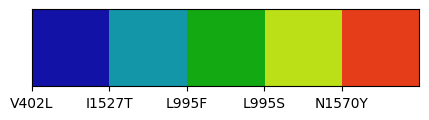

In [ ]:
palette = sns.color_palette('nipy_spectral', n_colors=len(var_label), desat=0.8)
sns.palplot(palette)
f_colors = {l: c for l,c in zip(var_label,palette)}
plt.gca().set_xticklabels(var_label)

In [ ]:
col = {'var':'coral','WT':''}

In [ ]:
#lines = [Line2D([0], [0], color=v, label=k, linewidth=1.2, linestyle='dotted') for k, v in cmap.items()]

In [ ]:
import cartopy.crs as ccrs
import numpy as np

def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length:
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length)

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip



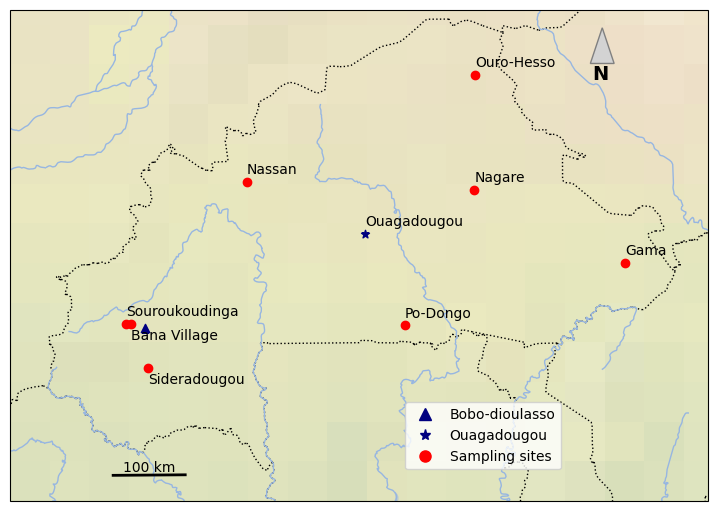

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(9,9), subplot_kw=subplot_kw)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.stock_img()

for i in df_selected_col.itertuples():
  ax.scatter(i.lon, i.lat, color='red',transform=ccrs.PlateCarree())
  plt.text(i.lon, i.coords_lat, i.area)

ax.scatter(-1.5242, 12.3691, color = 'navy', marker='*', transform=ccrs.PlateCarree())
plt.text(-1.5242, 12.4691, 'Ouagadougou')

ax.scatter(-4.2924, 11.1836, color = 'navy', marker='^', transform=ccrs.PlateCarree())

plt.arrow(1.472, 14.520,0,0,width=.1, shape='full', facecolor='lightgray', edgecolor='gray')
plt.text(1.3502, 14.320, 'N',fontsize=14,fontweight='bold')
#ax.scatter(1.492, 14.920, color = 'navy', marker='^', s=300, facecolors='gray', edgecolors='gray', transform=ccrs.PlateCarree())

ax.set_extent([-6, 2.8, 9, 15.2], crs=ccrs.PlateCarree())

point1 = Line2D([],[], color='red', marker='o', linestyle='None', markersize=8, label='Sampling sites')
point2 = Line2D([],[], color='navy', marker='*', linestyle='None', markersize=8, label='Ouagadougou')
point3 = Line2D([],[], color='navy', marker='^', linestyle='None', markersize=8, label='Bobo-dioulasso')

plt.legend(handles=[point3, point2,point1],bbox_to_anchor=(0.8, 0.05), loc='lower right')

scale_bar(ax, 100, location=(0.2,0.05), linewidth=2)

plt.show()

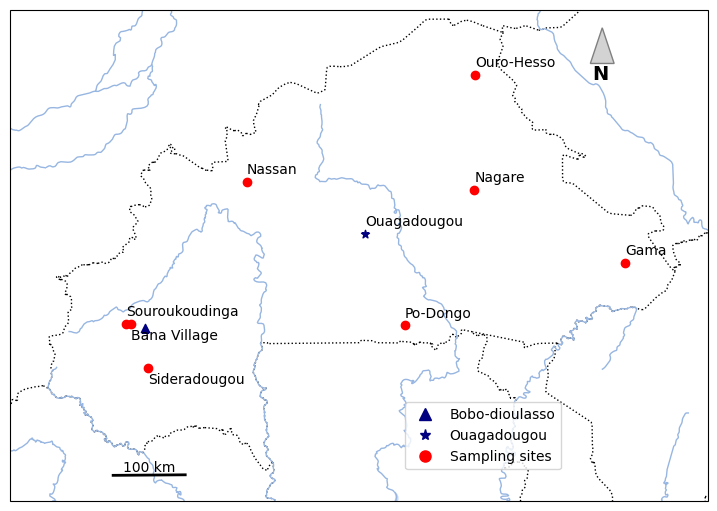

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(9,9), subplot_kw=subplot_kw)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
#ax.add_feature(cfeature.LAND)
#ax.stock_img()

for i in df_selected_col.itertuples():
  ax.scatter(i.lon, i.lat, color='red',transform=ccrs.PlateCarree())
  plt.text(i.lon, i.coords_lat, i.area)

ax.scatter(-1.5242, 12.3691, color = 'navy', marker='*', transform=ccrs.PlateCarree())
plt.text(-1.5242, 12.4691, 'Ouagadougou')

ax.scatter(-4.2924, 11.1836, color = 'navy', marker='^', transform=ccrs.PlateCarree())

plt.arrow(1.472, 14.520,0,0,width=.1, shape='full', facecolor='lightgray', edgecolor='gray')
plt.text(1.3502, 14.320, 'N',fontsize=14,fontweight='bold')
#ax.scatter(1.492, 14.920, color = 'navy', marker='^', s=300, facecolors='gray', edgecolors='gray', transform=ccrs.PlateCarree())

ax.set_extent([-6, 2.8, 9, 15.2], crs=ccrs.PlateCarree())

point1 = Line2D([],[], color='red', marker='o', linestyle='None', markersize=8, label='Sampling sites')
point2 = Line2D([],[], color='navy', marker='*', linestyle='None', markersize=8, label='Ouagadougou')
point3 = Line2D([],[], color='navy', marker='^', linestyle='None', markersize=8, label='Bobo-dioulasso')

plt.legend(handles=[point3, point2,point1],bbox_to_anchor=(0.8, 0.05), loc='lower right')

scale_bar(ax, 100, location=(0.2,0.05), linewidth=2)

plt.show()

In [ ]:
df_selected_col.columns

Index(['area', 'taxon', 'lat', 'lon', 'nobs', 'I1527T', 'L995F', 'L995S',
       'N1570Y', 'V402L', 'coords_lat'],
      dtype='object', name='aa_change')

In [ ]:
df_selected_col1 = df_selected_col.copy()[['area', 'taxon', 'lat', 'lon', 'nobs', 'I1527T','V402L','coords_lat']]
df_selected_col1

aa_change,area,taxon,lat,lon,nobs,I1527T,V402L,coords_lat
populations,,,,,,,,
Bana_colu_2022,Bana Village,coluzzii,11.233,-4.472,240,123.0,123.0,11.034
Gama_colu_2022,Gama,coluzzii,12.003,1.762,78,43.0,43.0,12.103
Naga_colu_2022,Nagare,coluzzii,12.927,-0.142,200,102.0,101.0,13.027
Nass_colu_2022,Nassan,coluzzii,13.028,-3.014,64,39.0,39.0,13.128
Ouro_colu_2022,Ouro-Hesso,coluzzii,14.375,-0.128,122,77.0,77.0,14.475
Po-D_colu_2022,Po-Dongo,coluzzii,11.219,-1.020,40,18.0,18.0,11.319
Side_colu_2022,Sideradougou,coluzzii,10.678,-4.256,20,9.0,9.0,10.478
Sour_colu_2022,Souroukoudinga,coluzzii,11.235,-4.535,122,55.0,54.0,11.336


In [ ]:
df_selected_col1['coords_lat1'] = [11.717, 12.742, 13.529, 13.657, 14.738, 11.652, 10.207, 11.857]
df_selected_col1['coords_lon1'] = [-3.790, 1.445, 0.467, -2.950, -0.530,  -1.406, -3.966, -5.142]

#df_selected_col1['coords_lat1'] = [11.034, 12.103, 13.027, 13.128, 14.475, 11.319, 10.478, 11.336]
#df_selected_col1['coords_lon1'] = [11.034, 12.103, 13.027, 13.128, 14.475, 11.319, 10.478, 11.336]

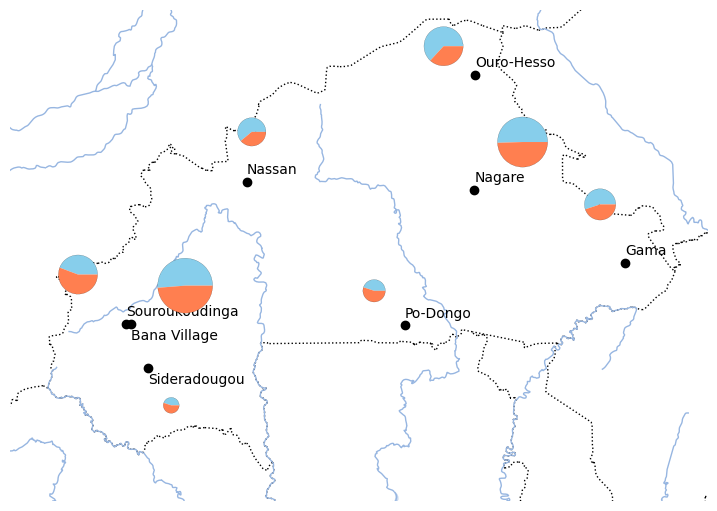

In [ ]:
pie_scale_factor=0.0005
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(9,90), subplot_kw=subplot_kw)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
#ax.add_feature(cfeature.LAND)
#ax.stock_img()

for _, row in df_selected_col1.iterrows():
  freq_ratios1 = np.asarray([row['V402L']/row.nobs])
  ratios1 = np.append(freq_ratios1, 1-(np.sum(freq_ratios1)))

  centre1 = (row.coords_lon1, row.coords_lat1)
  radius1 = np.sqrt(row.nobs*pie_scale_factor)

  ax.pie(ratios1, wedgeprops=dict(zorder=7, linewidth=0), colors=['skyblue','coral'], center=centre1, radius=radius1, shadow=False)
  ax.add_patch(plt.Circle(xy=centre1, radius=radius1, facecolor='none', edgecolor='k', zorder=8, lw=0.1))

for i in df_selected_col1.itertuples():
  ax.scatter(i.lon, i.lat, color='k',transform=ccrs.PlateCarree())
  plt.text(i.lon, i.coords_lat, i.area)

ax.set_extent([-6, 2.8, 9, 15.2], crs=ccrs.PlateCarree())

plt.show()

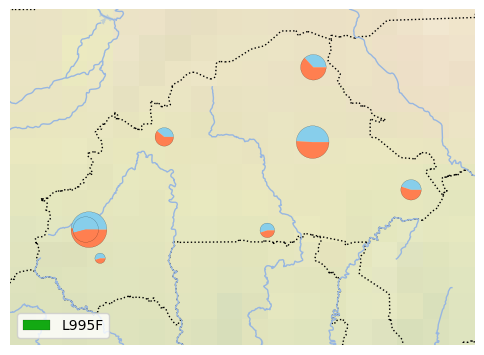

In [ ]:
pie_scale_factor=0.0005
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=subplot_kw)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.stock_img()

for _, row in df_selected_col.iterrows():
  freq_ratios = np.asarray([row['L995F']/row.nobs])
  ratios = np.append(freq_ratios, 1-np.sum(freq_ratios))

  centre = (row.lon, row.lat)
  radius = np.sqrt(row.nobs*pie_scale_factor)

  ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=['skyblue','coral'], center=centre, radius=radius, shadow=False)
  ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=0.1))

handles = [mpl.patches.Patch(facecolor=f_colors['L995F'], edgecolor='k', linewidth=0.1, label='L995F')]
ax.legend(handles=handles, bbox_to_anchor=(0,0), loc='lower left')


ax.set_extent([-6, 3, 9, 15.5], crs=ccrs.PlateCarree())

plt.show()

## Haplotype clusters distribution in Burkina Faso

In [ ]:
df_selected_col1['dif_lat'] = df_selected_col1.coords_lat1 - df_selected_col1.lat
df_selected_col1['dif_lon'] = df_selected_col1.coords_lon1 - df_selected_col1.lon
#df_selected_col1

In [ ]:
haplo_colors = sns.color_palette(n_colors=len(haps_id))
haplo_colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

In [ ]:
df_haplo.columns

Index(['location', 'latitude', 'longitude', 'year', 'aim_species', 'nobs',
       'FVI/FVI', 'FL1T/LVI', 'LL1T/LL1T', 'LL1T/LL2T', 'FL2T/LVI', 'OD',
       'offset_lat', 'offset_lon'],
      dtype='object', name='haplo_id')

In [ ]:
#df_haplos_col

ValueError: Wedge sizes 'x' must be non negative values

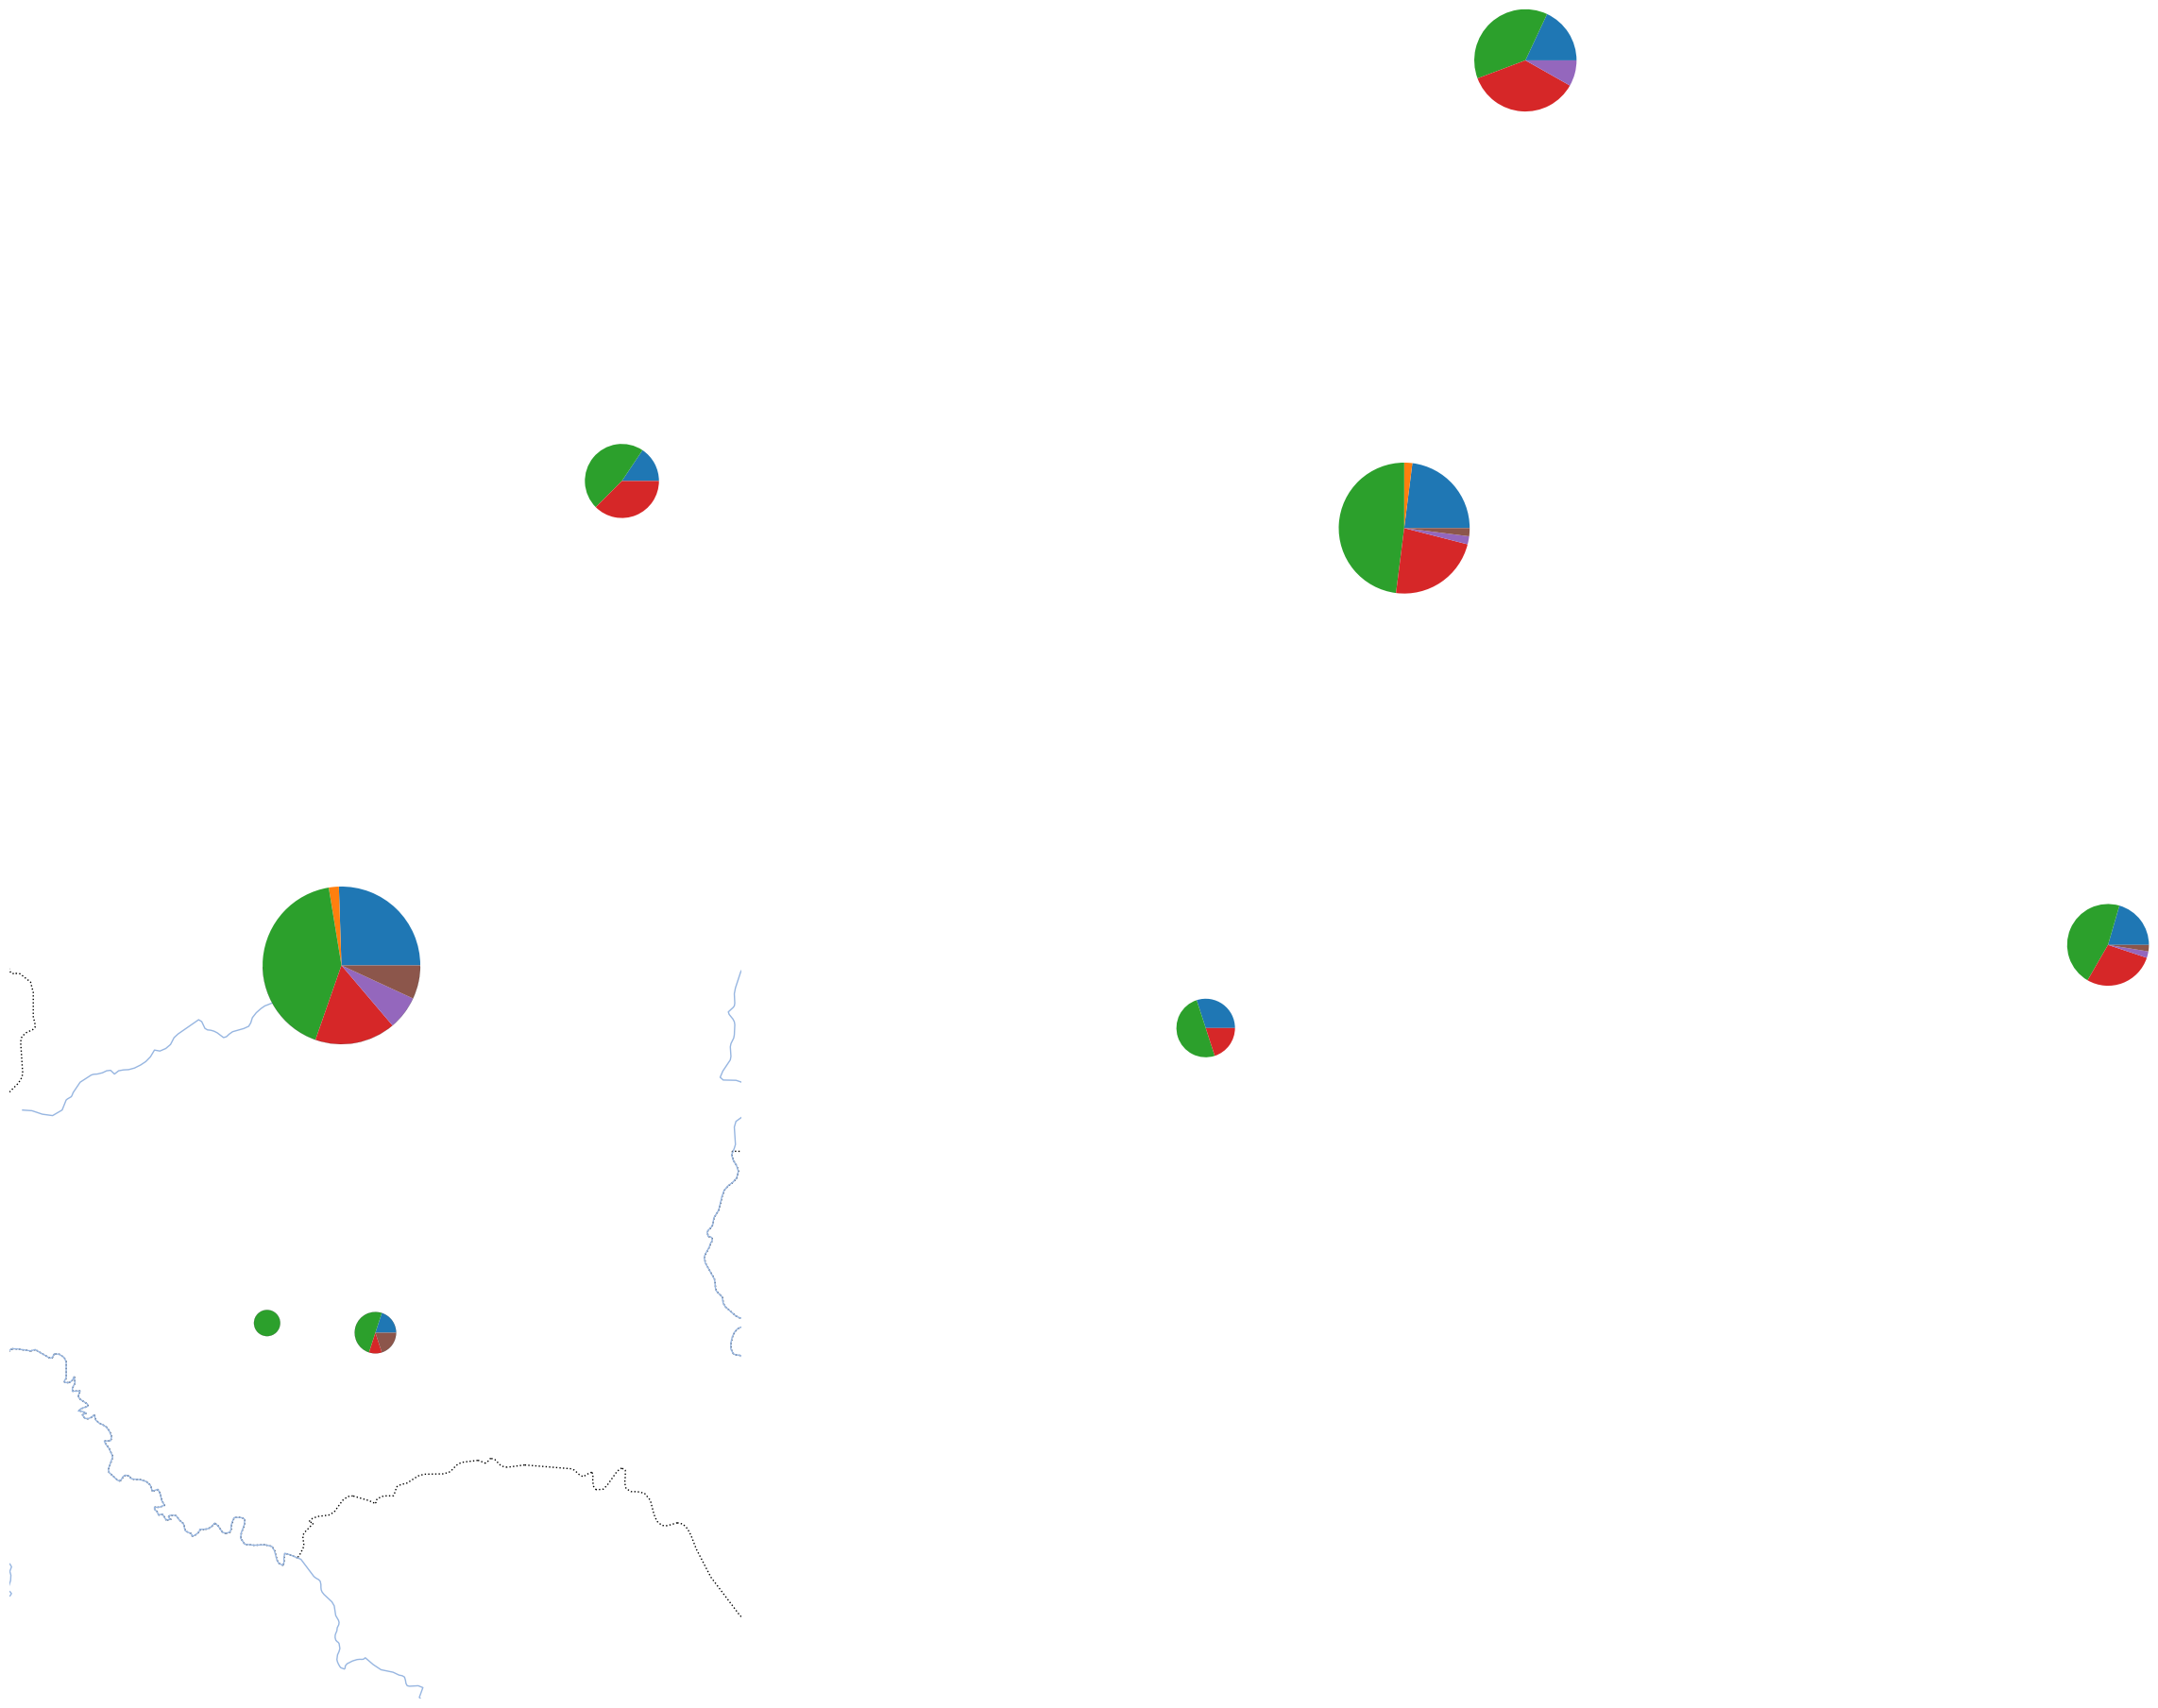

In [ ]:
df_haplos = df_samples.pivot_table(index=['location','area_lab','latitude','longitude','aim_species'], columns='haplo_id', aggfunc='size').reset_index().fillna(0)
#df_haplos.set_index('location', inplace=True)
df_haplos['nobs'] = df_haplos[['FVI/FVI', 'LL1T/LL2T', 'OD', 'FL1T/LVI', 'LL1T/LL1T', 'FL2T/LVI']].sum(axis=1)
df_haplos = df_haplos[['location','area_lab', 'latitude', 'longitude', 'aim_species','nobs', 'FVI/FVI', 'LL1T/LL2T', 'OD', 'FL1T/LVI', 'LL1T/LL1T', 'FL2T/LVI']]
gost_list = []
for i, j in zip(df_haplos.area_lab, df_haplos.aim_species):
  gost_list.append(i+'_'+j[:3])
df_haplos['labsp'] = gost_list
####
offset_lat = {'Bana Village':0.4, 'Degue-Degue':-0.3 ,'Gama':-0.30, 'Nagare':0.2,
              'Nassan':0.26, 'Ouro-Hesso':0.35, 'Po-Dongo':0.2, 'Sideradougou':-0.3,
              'Souroukoudinga':0.4}
offset_lon = {'Bana Village':0.3, 'Degue-Degue':-0.1, 'Gama':0.1, 'Nagare':-0.4,
              'Nassan':-0.2, 'Ouro-Hesso':0, 'Po-Dongo':-0.2, 'Sideradougou':0.20,
              'Souroukoudinga':-0.3}

offset_lat1 = {'Bana Village':-0.05, 'Degue-Degue':-0.02 ,'Gama':0.3, 'Nagare':0.2,
              'Nassan':0.2, 'Ouro-Hesso':0.363, 'Po-Dongo':0.2, 'Sideradougou':0.01,
              'Souroukoudinga':-0.15}
offset_lon1 = {'Bana Village':0.4, 'Degue-Degue':-0.3, 'Gama':0.1, 'Nagare':0.15,
              'Nassan':0.15, 'Ouro-Hesso':0.402, 'Po-Dongo':0.2, 'Sideradougou':0.390,
              'Souroukoudinga':-0.3}

offset_lat2 = {'Bana Village':-0.05, 'Degue-Degue':-0.02 ,'Gama':0.3, 'Nagare':0.2,
              'Nassan':0.2, 'Ouro-Hesso':-0.25, 'Po-Dongo':0.2, 'Sideradougou':0.01,
              'Souroukoudinga':-0.15}

offset_lon2 = {'Bana Village':0.5, 'Degue-Degue':-1.1, 'Gama':-0.7, 'Nagare':0.23,
              'Nassan':0.2, 'Ouro-Hesso':-0.3, 'Po-Dongo':0.3, 'Sideradougou':0.5,
              'Souroukoudinga':-1.1}

offset_lat3 = {'Bana Village':0.73, 'Degue-Degue':-0.4 ,'Gama':-0.33, 'Nagare':0.48,
              'Nassan':0.46, 'Ouro-Hesso':0.35, 'Po-Dongo':0.35, 'Sideradougou':-0.5,
              'Souroukoudinga':0.65}
offset_lon3 = {'Bana Village':0.1, 'Degue-Degue':-0.75, 'Gama':-0.65, 'Nagare':-0.6,
              'Nassan':-0.52, 'Ouro-Hesso':-0.8, 'Po-Dongo':-0.5, 'Sideradougou':0,
              'Souroukoudinga':-0.6}
offset_lat4 = {'Bana Village':0.08, 'Degue-Degue':-0.2 ,'Gama':0.0, 'Nagare':-0.15,
              'Nassan':-0.15, 'Ouro-Hesso':-0.15, 'Po-Dongo':-0.15, 'Sideradougou':-0.2,
              'Souroukoudinga':-0.01}
offset_lon4 = {'Bana Village':-0.3, 'Degue-Degue':-0.8, 'Gama':0.06, 'Nagare':-0.2,
              'Nassan':-0.2, 'Ouro-Hesso':-0.3, 'Po-Dongo':-0.3, 'Sideradougou':0,
              'Souroukoudinga':-1.1}
df_haplos['offset_lat'] = [offset_lat[i] for i in df_haplos.location]
df_haplos['offset_lat1'] = [offset_lat1[i] for i in df_haplos.location]
df_haplos['offset_lat2'] = [offset_lat2[i] for i in df_haplos.location]
df_haplos['offset_lat3'] = [offset_lat3[i] for i in df_haplos.location]
df_haplos['offset_lat4'] = [offset_lat4[i] for i in df_haplos.location]

df_haplos['offset_lon'] = [offset_lon[i] for i in df_haplos.location]
df_haplos['offset_lon1'] = [offset_lon1[i] for i in df_haplos.location]
df_haplos['offset_lon2'] = [offset_lon2[i] for i in df_haplos.location]
df_haplos['offset_lon3'] = [offset_lon3[i] for i in df_haplos.location]
df_haplos['offset_lon4'] = [offset_lon4[i] for i in df_haplos.location]

df_haplos_col = df_haplos.query('aim_species=="coluzzii"')
df_haplos_gamb = df_haplos.query('aim_species=="gambiae"')
df_haplos_arab = df_haplos.query('aim_species=="arabiensis"')

pie_scale_factor=0.0005
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10,93), subplot_kw=subplot_kw)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
#ax.add_feature(cfeature.LAND)
#ax.stock_img(),

for _, row in df_haplos_col.iterrows():
  freq_ratios = np.asarray([row[f'{i}']/row.nobs for i in haps_id])
  ratios = np.append(freq_ratios, 1-np.sum(freq_ratios))
  #print(ratios)

  centre = (row.longitude+row.offset_lon, row.latitude+row.offset_lat)
  #print(centre)
  radius = np.sqrt(row.nobs*pie_scale_factor)
  #print(radius)

  ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=haplo_colors, center=centre, radius=radius, shadow=False)
  ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=0.1))

for _, row in df_haplos_gamb.iterrows():
  freq_ratios = np.asarray([row[f'{i}']/row.nobs for i in haps_id])
  ratios = np.append(freq_ratios, 1-np.sum(freq_ratios))
  print(ratios)

  centre = (row.longitude+row.offset_lon1, row.latitude+row.offset_lat1)
  radius = np.sqrt(row.nobs*pie_scale_factor)

  ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=haplo_colors, center=centre, radius=radius, shadow=False)
  ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=0.1))

for i in df_haplos_gamb.itertuples():
  #ax.scatter(i.longitude, i.latitude, color='k',transform=ccrs.PlateCarree())
  plt.text(i.longitude+i.offset_lon2, i.latitude+i.offset_lat2, i.labsp)

for i in df_haplos_col.itertuples():
  #ax.scatter(i.longitude, i.latitude, color='k',transform=ccrs.PlateCarree())
  plt.text(i.longitude+i.offset_lon3, i.latitude+i.offset_lat3, i.labsp)

for i in df_haplos_col.itertuples():
  ax.scatter(i.longitude, i.latitude, marker='^', s=5, color='k',transform=ccrs.PlateCarree())
  plt.text(i.longitude+i.offset_lon4, i.latitude+i.offset_lat4, i.location,fontsize=8)

ax.scatter(-1.5242, 12.3691, color = 'navy', marker='*', transform=ccrs.PlateCarree())
plt.text(-1.5242, 12.4691, 'Ouagadougou')

ax.set_extent([-6, 2.8, 9, 15.2], crs=ccrs.PlateCarree())

cmap = dict(zip(haps_id, haplo_colors))
#handles = [patches(color=v, label=k) for k, v in cmap.items()]
handles = [mpl.patches.Patch(color=v, label=hap_labels[k]) for k, v in cmap.items()]
ax.legend(handles=handles, bbox_to_anchor=(0.8, 0), loc='lower right', title="Diplotypes group",
          ncol=1, prop={'size': 10}, frameon=False,alignment='left')

plt.arrow(1.472, 14.520,0,0,width=.1, shape='full', facecolor='lightgray', edgecolor='gray')
plt.text(1.3502, 14.320, 'N',fontsize=14,fontweight='bold')
scale_bar(ax, 100, location=(0.2,0.05), linewidth=2)

plt.show()

fig.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/diplo_dist_fig1.png',dpi=300, bbox_inches='tight')

In [ ]:
pie_scale_factor=0.0005
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10,93), subplot_kw=subplot_kw)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
#ax.stock_img(),

for _, row in df_haplos_col.iterrows():
  freq_ratios = np.asarray([row[f'{i}']/row.nobs for i in haps_id])
  ratios = np.append(freq_ratios, 1-np.sum(freq_ratios))

  centre = (row.longitude+row.offset_lon, row.latitude+row.offset_lat)
  radius = np.sqrt(row.nobs*pie_scale_factor)

  ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=haplo_colors, center=centre, radius=radius, shadow=False)
  ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=0.1))

for _, row in df_haplos_gamb.iterrows():
  freq_ratios = np.asarray([row[f'{i}']/row.nobs for i in haps_id])
  ratios = np.append(freq_ratios, 1-np.sum(freq_ratios))

  centre = (row.longitude+row.offset_lon1, row.latitude+row.offset_lat1)
  radius = np.sqrt(row.nobs*pie_scale_factor)

  ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=haplo_colors, center=centre, radius=radius, shadow=False)
  ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=0.1))

for i in df_haplos_gamb.itertuples():
  #ax.scatter(i.longitude, i.latitude, color='k',transform=ccrs.PlateCarree())
  plt.text(i.longitude+i.offset_lon2, i.latitude+i.offset_lat2, i.labsp)

for i in df_haplos_col.itertuples():
  #ax.scatter(i.longitude, i.latitude, color='k',transform=ccrs.PlateCarree())
  plt.text(i.longitude+i.offset_lon3, i.latitude+i.offset_lat3, i.labsp)

for i in df_haplos_col.itertuples():
  ax.scatter(i.longitude, i.latitude, marker='^', s=5, color='k',transform=ccrs.PlateCarree())
  plt.text(i.longitude+i.offset_lon4, i.latitude+i.offset_lat4, i.location,fontsize=8)

ax.scatter(-1.5242, 12.3691, color = 'navy', marker='*', transform=ccrs.PlateCarree())
plt.text(-1.5242, 12.4691, 'Ouagadougou')

ax.set_extent([-6, 2.8, 9, 15.2], crs=ccrs.PlateCarree())

cmap = dict(zip(haps_id, haplo_colors))
#handles = [patches(color=v, label=k) for k, v in cmap.items()]
handles = [mpl.patches.Patch(color=v, label=hap_labels[k]) for k, v in cmap.items()]
ax.legend(handles=handles, bbox_to_anchor=(0.8, 0), loc='lower right', title="Diplotypes group",
          ncol=1, prop={'size': 10}, frameon=False,alignment='left')

plt.arrow(1.472, 14.520,0,0,width=.1, shape='full', facecolor='lightgray', edgecolor='gray')
plt.text(1.3502, 14.320, 'N',fontsize=14,fontweight='bold')
scale_bar(ax, 100, location=(0.2,0.05), linewidth=2)

plt.show()

fig.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/diplo_dist_fig2.png',dpi=300, bbox_inches='tight')

In [ ]:
pie_scale_factor=0.0005
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10,93), subplot_kw=subplot_kw)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
#ax.stock_img(),

for _, row in df_haplos_col.iterrows():
  freq_ratios = np.asarray([row[f'{i}']/row.nobs for i in haps_id])
  ratios = np.append(freq_ratios, 1-np.sum(freq_ratios))

  centre = (row.longitude+row.offset_lon, row.latitude+row.offset_lat)
  radius = np.sqrt(row.nobs*pie_scale_factor)

  ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=haplo_colors, center=centre, radius=radius, shadow=False)
  ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=0.1))

for _, row in df_haplos_gamb.iterrows():
  freq_ratios = np.asarray([row[f'{i}']/row.nobs for i in haps_id])
  ratios = np.append(freq_ratios, 1-np.sum(freq_ratios))

  centre = (row.longitude+row.offset_lon1, row.latitude+row.offset_lat1)
  radius = np.sqrt(row.nobs*pie_scale_factor)

  ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=haplo_colors, center=centre, radius=radius, shadow=False)
  ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=0.1))

for i in df_haplos_gamb.itertuples():
  ax.scatter(i.longitude, i.latitude, color='k',transform=ccrs.PlateCarree())
  plt.text(i.longitude+i.offset_lon2, i.latitude+i.offset_lat2, i.labsp)

for i in df_haplos_col.itertuples():
  ax.scatter(i.longitude, i.latitude, color='k',transform=ccrs.PlateCarree())
  plt.text(i.longitude+i.offset_lon3, i.latitude+i.offset_lat3, i.labsp)

ax.scatter(-1.5242, 12.3691, color = 'navy', marker='*', transform=ccrs.PlateCarree())
plt.text(-1.5242, 12.4691, 'Ouagadougou')

ax.set_extent([-6, 2.8, 9, 15.2], crs=ccrs.PlateCarree())

cmap = dict(zip(haps_id, haplo_colors))
#handles = [patches(color=v, label=k) for k, v in cmap.items()]
handles = [mpl.patches.Patch(color=v, label=hap_labels[k]) for k, v in cmap.items()]
ax.legend(handles=handles, bbox_to_anchor=(0.8, 0), loc='lower right', title="Diplotypes group",
          ncol=1, prop={'size': 10}, frameon=False,alignment='left')

plt.show()

fig.savefig(fname='drive/MyDrive/sanger_analyses/resistance/VGSC/save_fig/diplo_dist_fig.png',dpi=300, bbox_inches='tight')

In [ ]:
pie_scale_factor=0.0005
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(9,90), subplot_kw=subplot_kw)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
#ax.add_feature(cfeature.LAND)
#ax.stock_img(),

for _, row in df_haplos_gamb.iterrows():
  freq_ratios = np.asarray([row[f'{i}']/row.nobs for i in haps_id])
  ratios = np.append(freq_ratios, 1-np.sum(freq_ratios))

  centre = (row.longitude, row.latitude	)
  radius = np.sqrt(row.nobs*pie_scale_factor)

  ax.pie(ratios, wedgeprops=dict(zorder=7, linewidth=0), colors=sns.color_palette(), center=centre, radius=radius, shadow=False)
  ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=0.1))

for i in df_haplos_gamb.itertuples():
  ax.scatter(i.longitude, i.latitude, color='k',transform=ccrs.PlateCarree())
  plt.text(i.longitude, i.latitude, i.location)

ax.set_extent([-6, 2.8, 9, 15.2], crs=ccrs.PlateCarree())

plt.show()